<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Hospital-Readmission-for-Diabetic-Patients" data-toc-modified-id="Predicting-Hospital-Readmission-for-Diabetic-Patients-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting Hospital Readmission for Diabetic Patients</a></span><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Comparing-Machine-Learning-Techniques:" data-toc-modified-id="Comparing-Machine-Learning-Techniques:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Comparing Machine Learning Techniques:</a></span></li><li><span><a href="#Creating-a-Baseline-Deep-Learning-Model:" data-toc-modified-id="Creating-a-Baseline-Deep-Learning-Model:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Creating a Baseline Deep Learning Model:</a></span></li><li><span><a href="#Smote:" data-toc-modified-id="Smote:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Smote:</a></span></li><li><span><a href="#Tuning:-Batch-Size-and-Number-of-Epochs-for-Neural-Networks" data-toc-modified-id="Tuning:-Batch-Size-and-Number-of-Epochs-for-Neural-Networks-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Tuning: Batch Size and Number of Epochs for Neural Networks</a></span></li><li><span><a href="#Tune-Training-Optimization-Algorithm:" data-toc-modified-id="Tune-Training-Optimization-Algorithm:-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Tune Training Optimization Algorithm:</a></span></li><li><span><a href="#Tune-Learning-Rate,-Momentum:" data-toc-modified-id="Tune-Learning-Rate,-Momentum:-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Tune Learning Rate, Momentum:</a></span></li><li><span><a href="#Tune-Weight-Initialization:" data-toc-modified-id="Tune-Weight-Initialization:-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Tune Weight Initialization:</a></span></li><li><span><a href="#Tune-Droprate-Regularization:" data-toc-modified-id="Tune-Droprate-Regularization:-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Tune Droprate Regularization:</a></span></li><li><span><a href="#Model-1:" data-toc-modified-id="Model-1:-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Model 1:</a></span><ul class="toc-item"><li><span><a href="#Applying-SMOTE-to-dataset" data-toc-modified-id="Applying-SMOTE-to-dataset-1.10.1"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>Applying SMOTE to dataset</a></span></li></ul></li></ul></li><li><span><a href="#SMOTE---Deep-Learning-Model-Optimization" data-toc-modified-id="SMOTE---Deep-Learning-Model-Optimization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SMOTE - Deep Learning Model Optimization</a></span><ul class="toc-item"><li><span><a href="#Tuning:-Batch-Size-and-Number-of-Epochs-for-Neural-Networks" data-toc-modified-id="Tuning:-Batch-Size-and-Number-of-Epochs-for-Neural-Networks-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tuning: Batch Size and Number of Epochs for Neural Networks</a></span></li><li><span><a href="#Tune-Training-Optimization-Algorithm:" data-toc-modified-id="Tune-Training-Optimization-Algorithm:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tune Training Optimization Algorithm:</a></span></li><li><span><a href="#Tune-Learning-Rate:" data-toc-modified-id="Tune-Learning-Rate:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Tune Learning Rate:</a></span></li><li><span><a href="#Tune-Model-Regularizers:" data-toc-modified-id="Tune-Model-Regularizers:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Tune Model Regularizers:</a></span></li></ul></li></ul></div>

Data Exploration / Model Tinkering


Admission Type:

Provided data dictionary indicates that integers 0-9 are used to represent codes. Based on research we will draw the following conclusions:

Personal physician referral (or self-referral)
This hospital's clinic referral
HMO referral
Transfer from another hospital
Transfer from nursing home
Transfer from another healthcare facility
This hospital's Emergency Room
Court or law enforcement
Information not available

# Predicting Hospital Readmission for Diabetic Patients

## Background
According to a [study](https://care.diabetesjournals.org/content/24/11/1936) published by the American Diabetes Association in 2001, the number of Americans diagnosed with diabetes is projected to increase by 165% by 2050. The study suggests this increase, from 11 million to 29 million affected individuals, would be most significant in individuals >= 75 years old.
<br>

While this increase itself is concerning when viewed from a human health perspective, it also represents additional logistical complications for the US healthcare system which should also be considered. The unfortunate reality is that hospitals possess limited resources in space, personnel, and time. As hospital costs rise as a product of increasing rates of Diabetes in the population, more hospital resources are required to accomodate patient health needs. The monetary cost of these resources is passed on to insurance companies, and ultimately to the public.

![image](img/F1.large.jpg)
Figure:
Percentage breakdowns of the projected increase in the total number of people with diagnosed diabetes due to population growth, increasing prevalence rates, and demographic changes for the years 2010, 2025, and 2050 (most likely scenario). □, Population growth; [cjs2106], increasing prevalence rates; ▪ demographic changes. [Source](https://care.diabetesjournals.org/content/24/11/1936.article-info)

<br>

When considering an approach to tackling this issue, an old addage may ring true: "An ounce of prevention is worth a pound of cure." By studying available medical records for Diabetic patients, we might be able to better determine presenting symptoms that might indicate that a patient is "at risk" for readmission. By identifying these symptoms (or collections of symptoms) using Artificial Intelligence, physicians may be better equipped to effectively treat underlying health issues in Diabetic patients, improving long-term patient prognosis. By providing more effective treatment options, we would hope to decrease hospital readmission rates in Diabetic patients worldwide.

<br>

In this investigation, we'll use a [dataset](http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008) representing 10 years (1999-2008) of clinical care records from 130 US hoptials. The dataset, contains ~100,000 patient encounters meeting the following criteria:

1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

<br>

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [131]:
# Import Libraries:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import random
import itertools

import keras
from keras.preprocessing.text import Tokenizer
from keras import models, layers, optimizers, regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Dense, Activation
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adamax
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import tree, svm, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report, f1_score

#from IPython.core.interactiveshell import InteractiveShell
#sns.set_style(style='')
sns.set_palette(palette='Set2')
%matplotlib inline

In [2]:
# Load / display feature/target DataFrames:
%store -r X
%store -r y
%store -r y_two
%store -r y_three

display(X.head())
display(y.head())
display(y_two.head())
display(y_three.head())

,gender,age,admission_type_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,discharge_home,log_add1_time_in_hospital,metformin_Down,metformin_No,metformin_Steady,metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,1,0,6,41,0,1,0,0,0,1,...,0,0.693147,0,1,0,0,0,1,0,0
1,1,1,1,59,0,18,0,0,0,9,...,1,1.386294,0,1,0,0,0,0,0,1
2,1,2,1,11,5,13,2,0,1,6,...,1,1.098612,0,1,0,0,0,1,0,0
3,0,3,1,44,1,16,0,0,0,7,...,1,1.098612,0,1,0,0,0,0,0,1
4,0,4,1,51,0,8,0,0,0,5,...,1,0.693147,0,1,0,0,0,0,1,0


,<30,>30,NO
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


0    0
1    1
2    0
3    0
4    0
Name: readmitted, dtype: int64

In [3]:
# This cell is here to allow the show_feature_importance function to run below:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35)

In [4]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Check if Normalization Option is Set to True. 
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without Normalization')
        
    # Print CNF Matrix
    print(cm)
    
    # Create the Matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Add Title, Axis Labels:
    # . classes = class_names
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add cell labels:
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    
    
def show_feature_importance(classifier_type, drop=[], X_train=X_train, X_test=X_test, \
                            y_train=y_train, y_test=y_test):
    
    X_train = X_train.drop(drop, axis=1)
    X_test = X_test.drop(drop, axis=1)

    #Choose model type and fit model: 
    classifier = classifier_type()
    classifier.fit(X_train, y_train)
    
    #Predict and evaluate performance: 
    pred_labels = classifier.predict(X_train)
    print(f'Train Performance: {classifier.score(X_train, y_train)}')
    print(f'Test Performance: {classifier.score(X_test, y_test)}')
    
    #Define, plot feature importance: 
    features, scores = X_test.columns, classifier.feature_importances_
    print(f'Classifier Feature Importances: {zip(features, classifier.feature_importances_)}')
    
    plt.figure(figsize=(16,16))
    plt.bar(features, sorted(scores))
    plt.title(f'Visualization: {classifier_type} feature importance')
    plt.xticks(rotation=75)
    plt.show()
    
def show_input_shapes(X_train, X_test, y_train, y_test):
    print(f'X_train Shape: {X_train.shape}, X_test Shape: {X_test.shape}')
    print(f'y_train Shape: {y_train.shape}, y_test Shape: {y_test.shape}')

In [5]:
'''
# Evaluating multicollinearity:
corr = X.corr()
fig = plt.figure(figsize=(18,18))
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, cmap='Blues', cbar=True)
ax.set_title("Multicollinearity")
'''

'\n# Evaluating multicollinearity:\ncorr = X.corr()\nfig = plt.figure(figsize=(18,18))\nsol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))\n                 .stack()\n                 .sort_values(ascending=False))\nax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, cmap=\'Blues\', cbar=True)\nax.set_title("Multicollinearity")\n'

In [6]:
#X_normalized = preprocessing.normalize(X)
x=X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_normalized = pd.DataFrame(x_scaled, columns=X.columns)
X_normalized.head()

,gender,age,admission_type_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,discharge_home,log_add1_time_in_hospital,metformin_Down,metformin_No,metformin_Steady,metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,1.0,0.000000,0.714286,0.305344,0.000000,0.0000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.111111,0.000000,0.442748,0.000000,0.2125,0.000000,0.0,0.0,0.533333,...,1.0,0.344010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.222222,0.000000,0.076336,0.833333,0.1500,0.047619,0.0,1.0,0.333333,...,1.0,0.201233,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.333333,0.000000,0.328244,0.166667,0.1875,0.000000,0.0,0.0,0.400000,...,1.0,0.201233,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.444444,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.0,0.266667,...,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Reviewing feature distribution:**

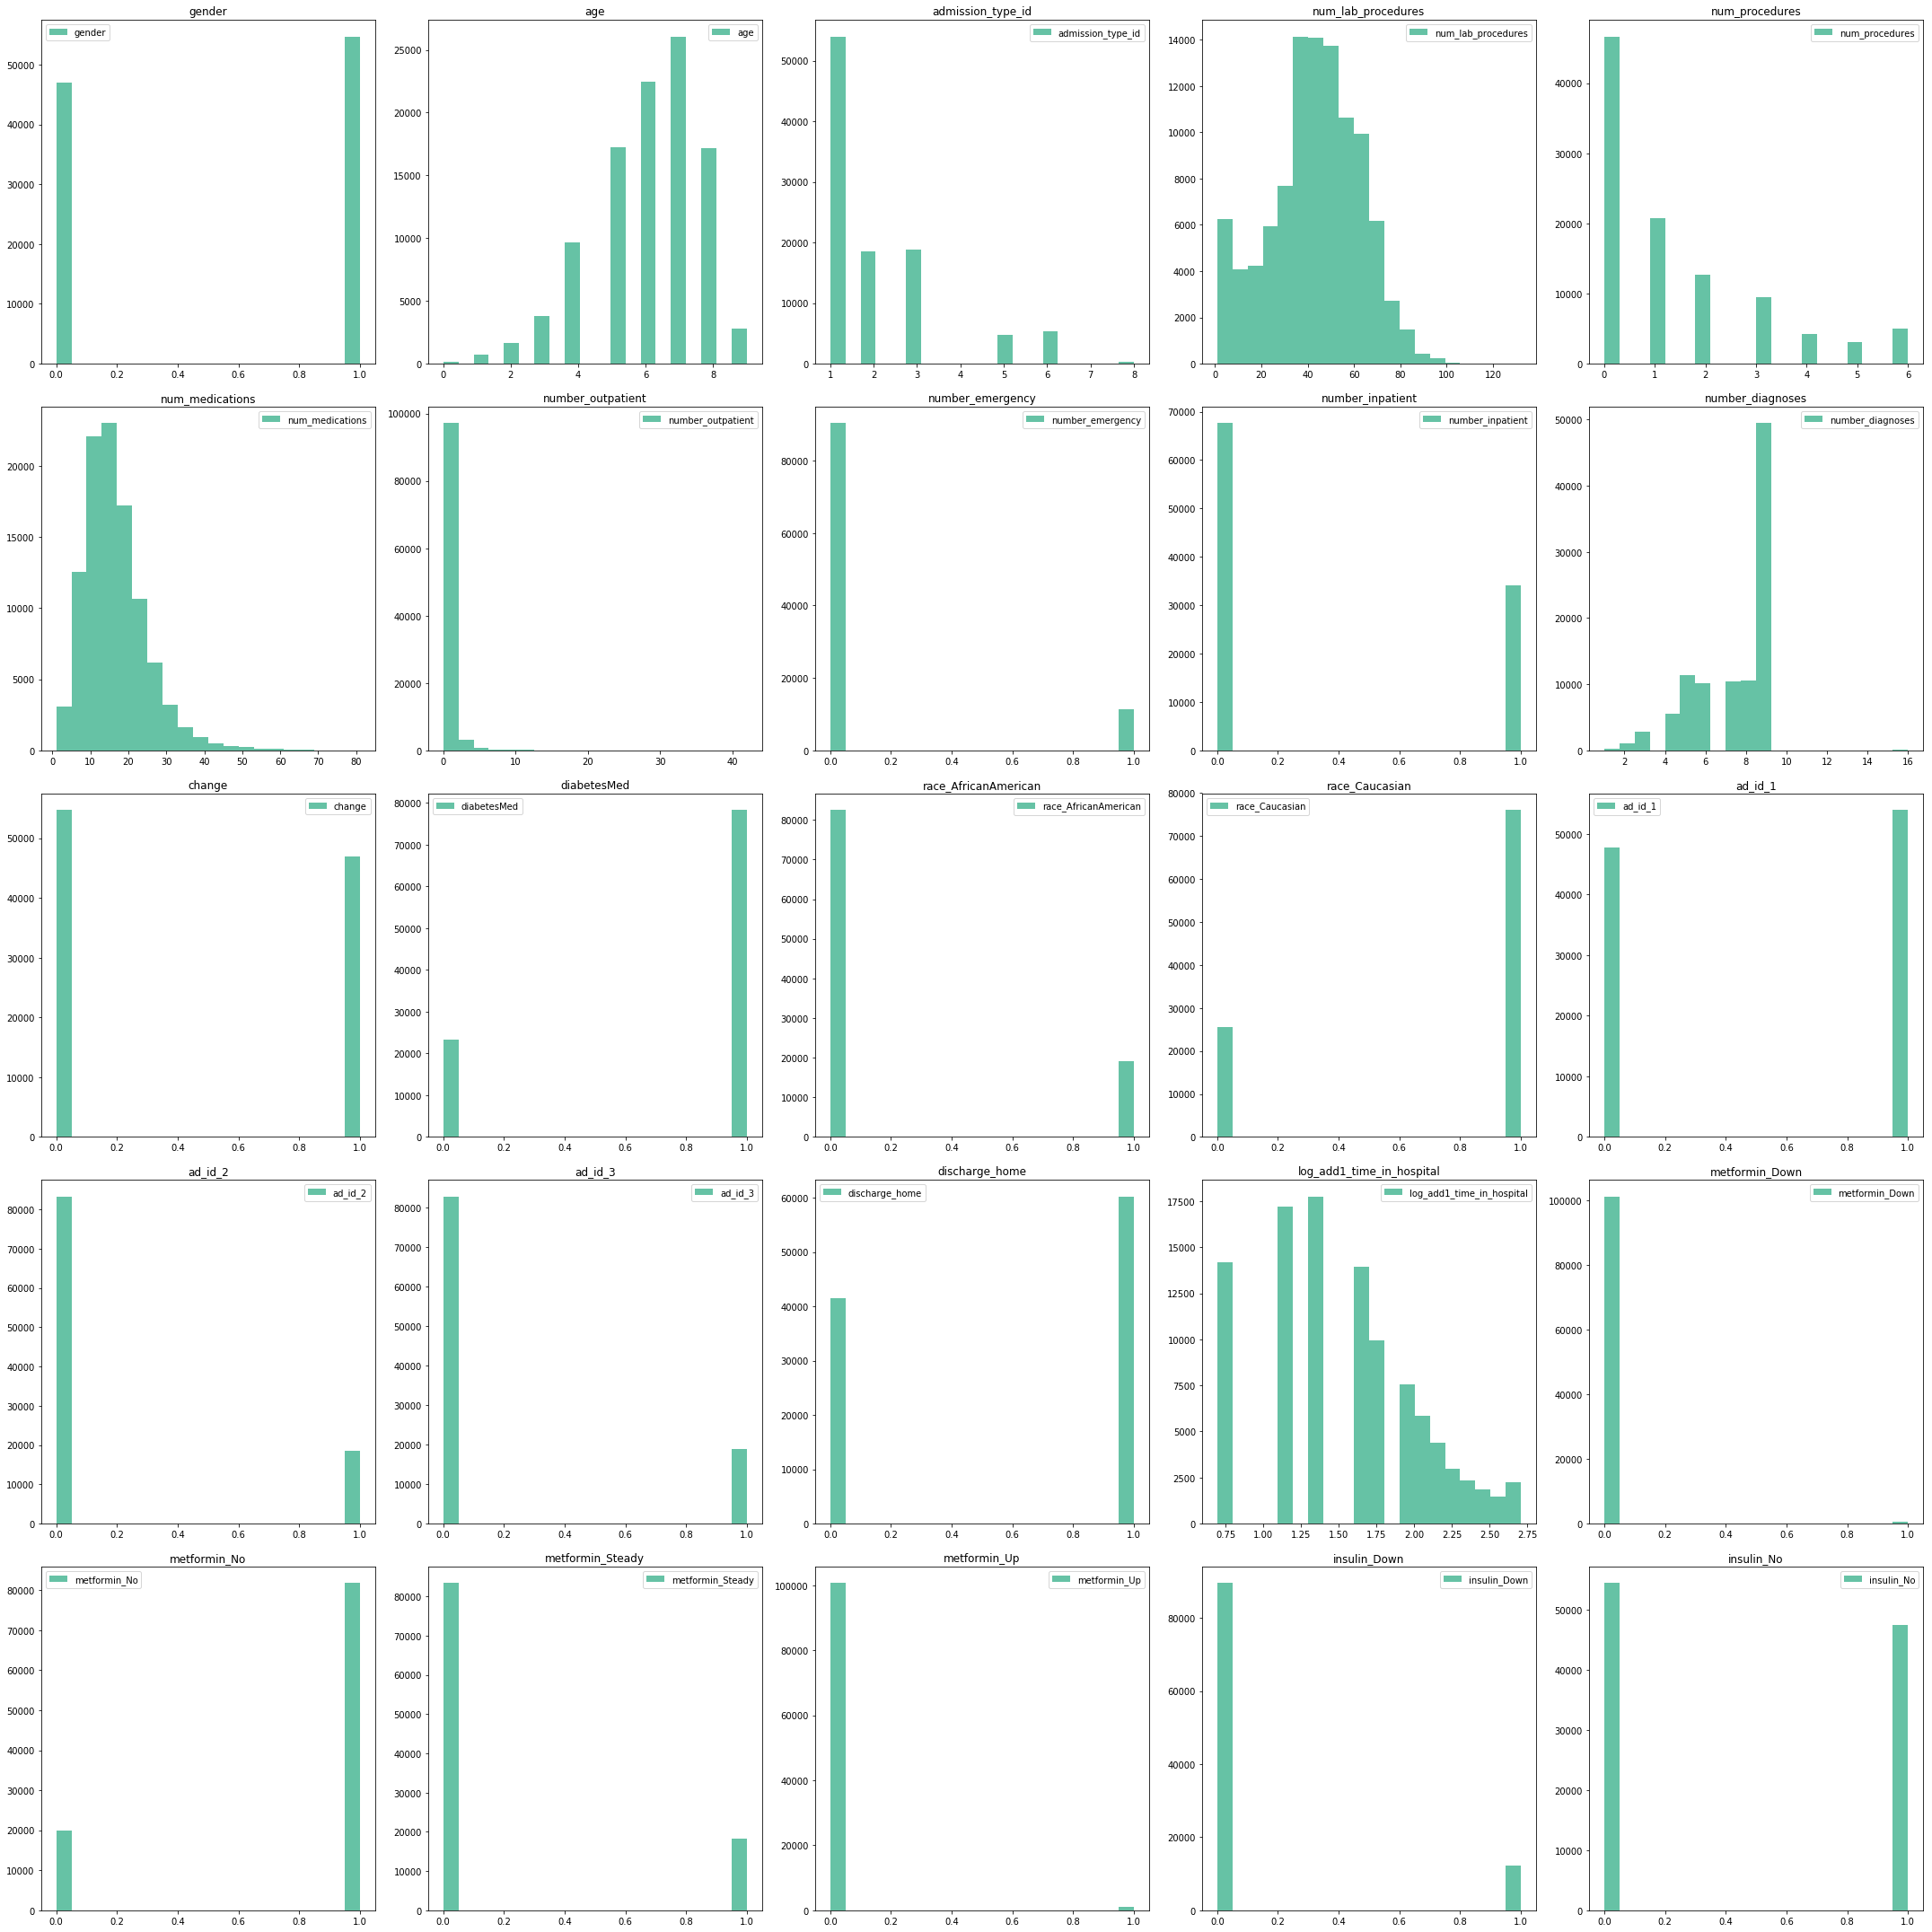

In [7]:
this, that = plt.subplots(5, 5, figsize=(30, 30))
for index, ax in enumerate(that.flatten()):
   column = X.columns[index]
   ax.hist(X[column], bins=20)
   ax.set_title(column)
   ax.legend()
plt.tight_layout(h_pad=1.5)
plt.show()

Text(0.5, 1.0, 'Multicollinearity')

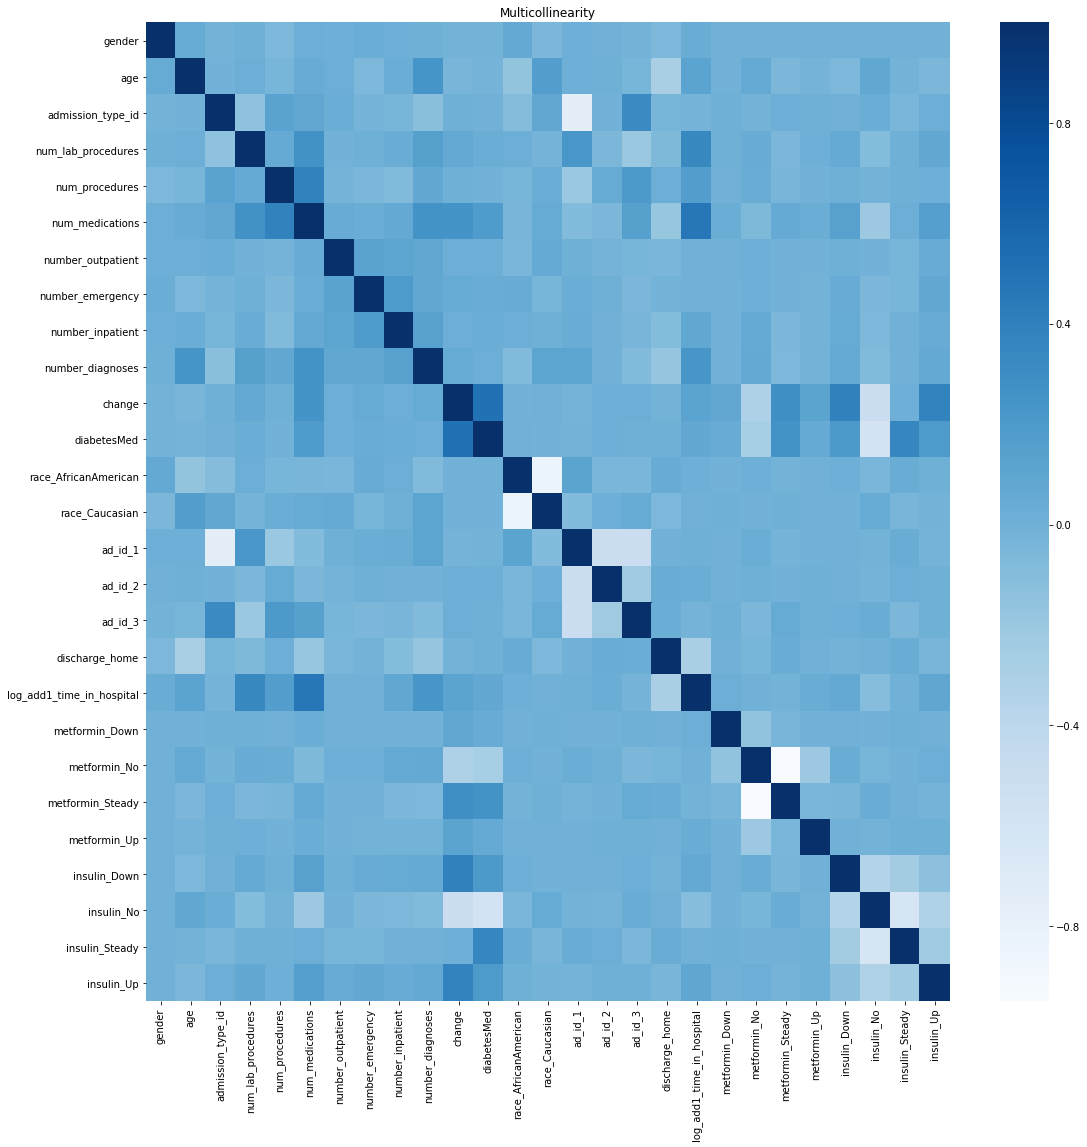

In [8]:
# Evaluating multicollinearity:
corr = X_normalized.corr()
fig = plt.figure(figsize=(18,18))
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, cmap='Blues', cbar=True)
ax.set_title("Multicollinearity")

In [9]:
display(sol.head(8))
display(sol.tail(8))

change              diabetesMed                  0.506360
num_medications     log_add1_time_in_hospital    0.466041
change              insulin_Down                 0.398655
num_procedures      num_medications              0.385761
change              insulin_Up                   0.381739
diabetesMed         insulin_Steady               0.360438
num_lab_procedures  log_add1_time_in_hospital    0.333546
admission_type_id   ad_id_3                      0.322145
dtype: float64

ad_id_1               ad_id_2            -0.500750
                      ad_id_3            -0.507162
change                insulin_No         -0.513695
diabetesMed           insulin_No         -0.585478
insulin_No            insulin_Steady     -0.615631
admission_type_id     ad_id_1            -0.753122
race_AfricanAmerican  race_Caucasian     -0.830662
metformin_No          metformin_Steady   -0.948567
dtype: float64

In [10]:
# Dropping columns: 
# ('metformin_No', 'metformin_Steady', 'admission_type_id', 'ad_id_1')
X_regression = X_normalized.drop(columns=(['metformin_No', 'metformin_Steady', \
                                           'admission_type_id', 'ad_id_1']), axis=1)
X_regression.columns

Index(['gender', 'age', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'change', 'diabetesMed',
       'race_AfricanAmerican', 'race_Caucasian', 'ad_id_2', 'ad_id_3',
       'discharge_home', 'log_add1_time_in_hospital', 'metformin_Down',
       'metformin_Up', 'insulin_Down', 'insulin_No', 'insulin_Steady',
       'insulin_Up'],
      dtype='object')

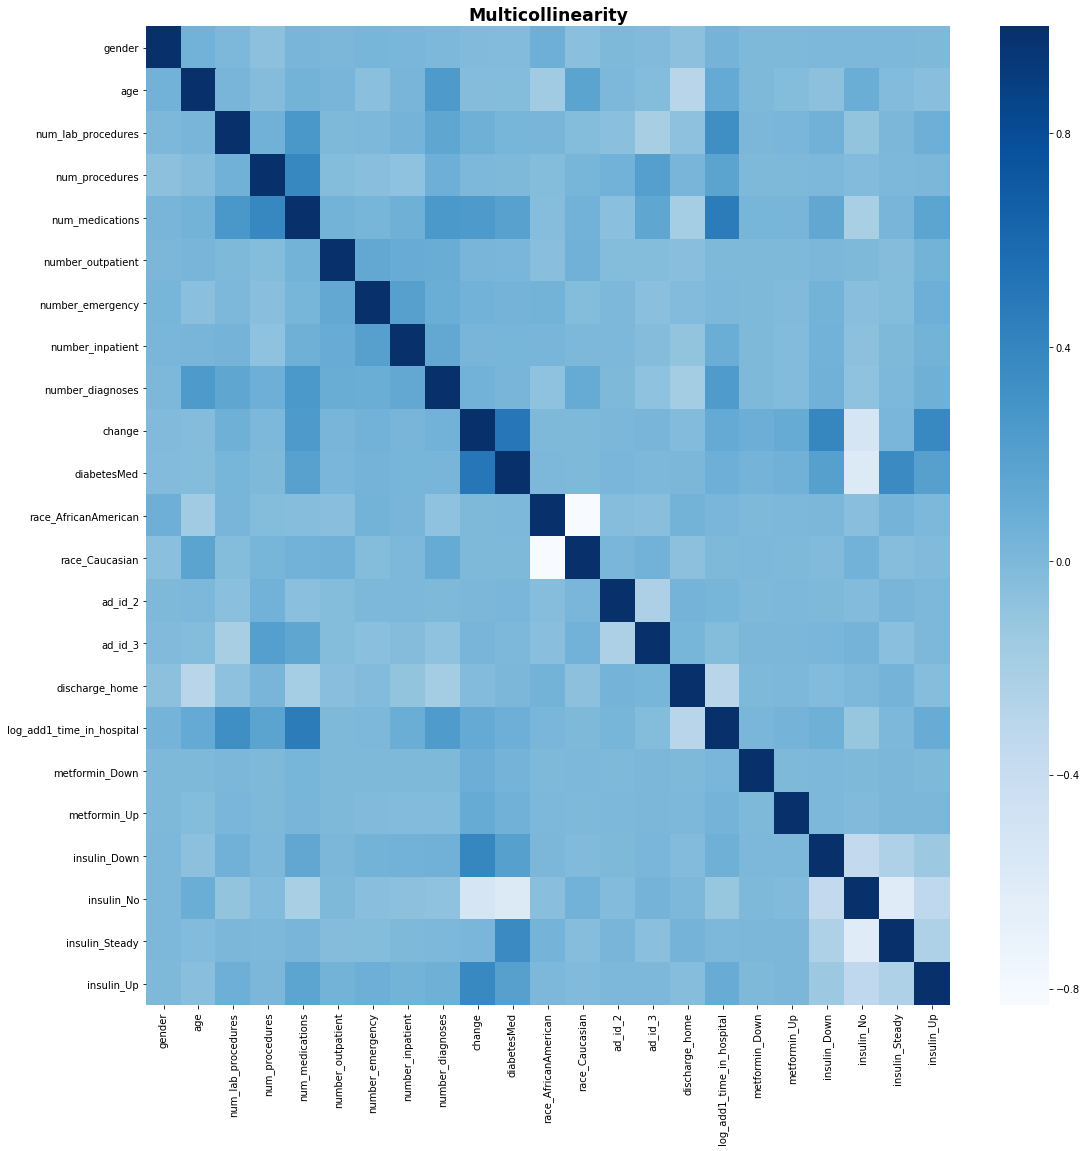

In [188]:
# Evaluating multicollinearity:
corr = X_regression.corr()
fig = plt.figure(figsize=(18,18))
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=False, cmap='Blues', cbar=True)
ax.set_title("Multicollinearity", size='xx-large', fontweight='semibold')

fig.savefig('img/Multicollinearity_assessment')

With these columns discarded, we can now segment data into Train/Test groups in order to create a baseline model:

In [11]:
labels = ['NO', '<30', '>30']
labels_dict = dict(zip(labels, range(len(labels))))
labels_dict

{'NO': 0, '<30': 1, '>30': 2}

In [12]:
y_labels_vec = y_two.readmitted.map(labels_dict)
y_labels_vec.head()

0    0
1    2
2    0
3    0
4    0
Name: readmitted, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_labels_vec, test_size=1200)

In [14]:
display(X_train[:5])
display(y_train[:5])

,gender,age,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,...,ad_id_2,ad_id_3,discharge_home,log_add1_time_in_hospital,metformin_Down,metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up
35671,1.0,0.888889,0.320611,0.000000,0.0625,0.00000,0.0,1.0,0.400000,1.0,...,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0
62628,1.0,0.777778,0.198473,0.333333,0.1875,0.00000,0.0,1.0,0.333333,0.0,...,0.0,1.0,0.0,0.454757,0.0,0.0,0.0,1.0,0.0,0.0
27808,1.0,0.777778,0.068702,0.000000,0.2000,0.02381,0.0,1.0,0.533333,1.0,...,0.0,0.0,1.0,0.201233,0.0,0.0,0.0,0.0,1.0,0.0
62078,0.0,0.777778,0.221374,0.000000,0.0875,0.02381,1.0,0.0,0.466667,0.0,...,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
81192,1.0,0.777778,0.442748,0.000000,0.1500,0.00000,0.0,0.0,0.466667,1.0,...,0.0,0.0,0.0,0.454757,0.0,0.0,0.0,0.0,1.0,0.0


35672    2
62629    1
27808    0
62079    2
81194    0
Name: readmitted, dtype: int64

In [15]:
classifier = linear_model.LogisticRegression(C=1e5, solver='newton-cg', multi_class='multinomial')
classifier.fit(X_train, y_train)
pred_labels = classifier.predict(X_train)

In [16]:
classifier.score(X_train, y_train)

0.5697324065511172

In [17]:
classifier.score(X_test, y_test)

0.5466666666666666

In [18]:
coefs = classifier.coef_[0]
top_preds = np.argpartition(coefs, -10)[-10:]
top_preds_sorted = top_preds[np.argsort(coefs[top_preds])]
print(X.columns[top_preds_sorted])

Index(['ad_id_2', 'race_Caucasian', 'number_diagnoses', 'ad_id_1',
       'log_add1_time_in_hospital', 'num_lab_procedures', 'metformin_Down',
       'metformin_Up', 'metformin_No', 'metformin_Steady'],
      dtype='object')


In [19]:
classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [20]:
coefs

array([-0.01879392, -0.0810143 , -0.06204785,  0.16224209, -0.12433083,
       -1.99469124, -0.336774  , -0.55898915, -0.67215753,  0.03594029,
       -0.18760568, -0.15734683, -0.1838969 ,  0.01036958,  0.09108533,
        0.00839694, -0.16921046,  0.00265403,  0.14901311,  0.23758723,
        0.34928903,  0.40437993,  0.2919478 ])

Next, let's experiment with removing additional features in order to drop maximize the accuracy of our baseline model.

Train Performance: 0.5722283543649255
Test Performance: 0.5491666666666667
Classifier Feature Importances: <zip object at 0x1a38761608>


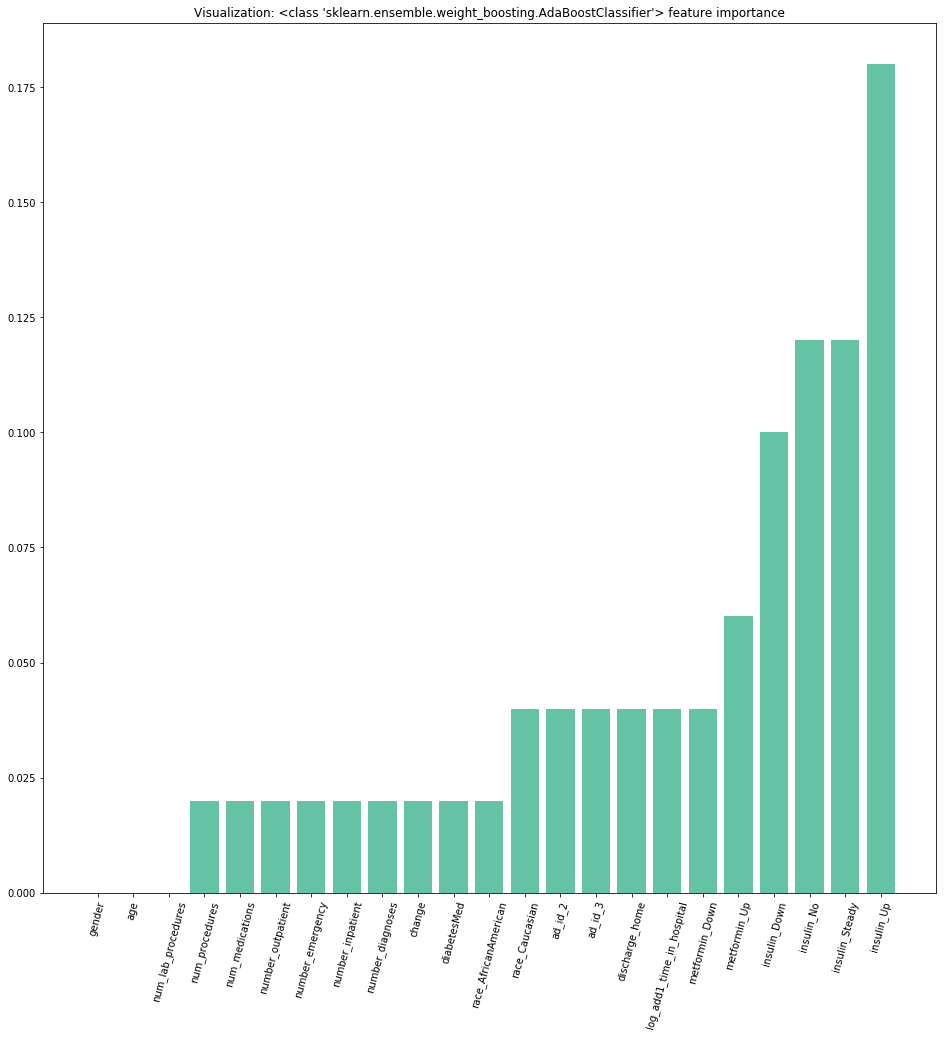

In [21]:
show_feature_importance(classifier_type=AdaBoostClassifier, X_train=X_train, \
                       X_test=X_test, y_train=y_train, y_test=y_test)

Train Performance: 0.5392539999801119
Test Performance: 0.5266666666666666
Classifier Feature Importances: <zip object at 0x1a386b0c88>


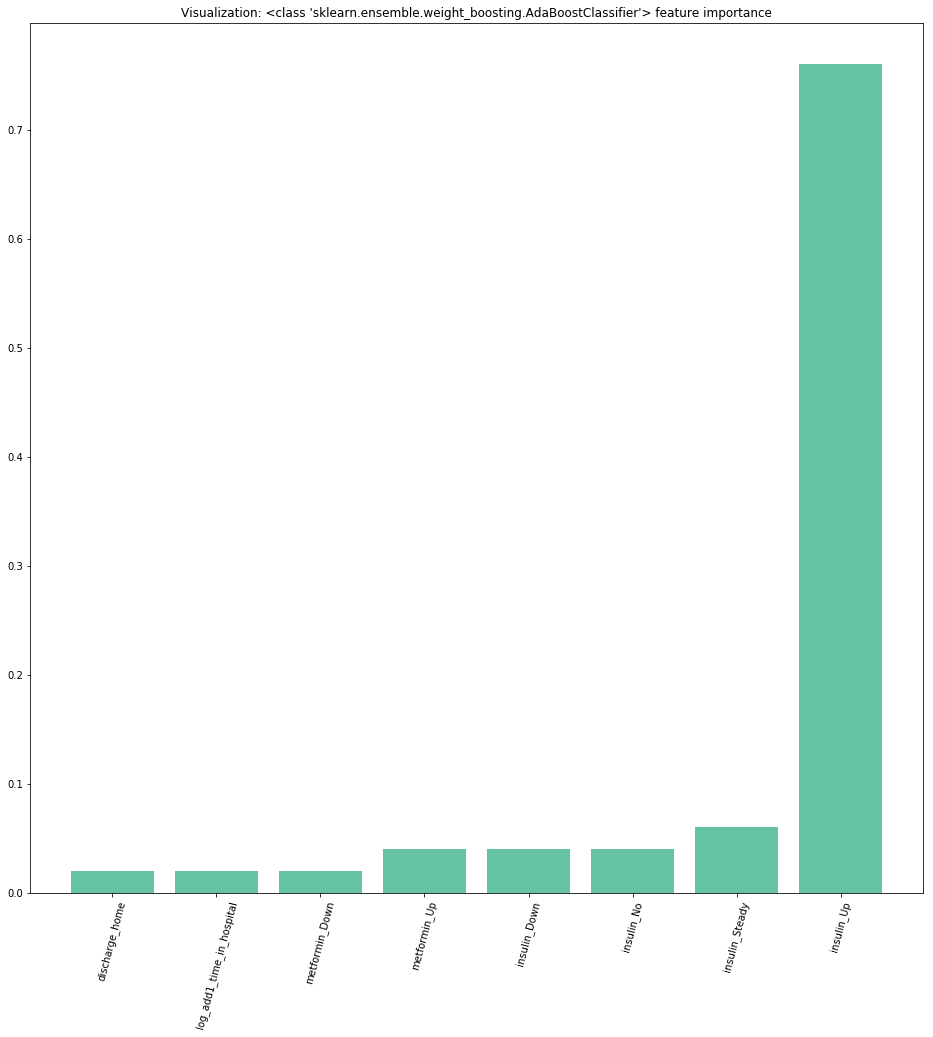

In [22]:
show_feature_importance(classifier_type=AdaBoostClassifier, X_train=X_train, \
                       X_test=X_test, y_train=y_train, y_test=y_test, drop=(['gender', \
                       'num_medications', 'age', 'num_procedures', \
                       'num_lab_procedures', 'number_outpatient', 'number_emergency', \
                       'number_inpatient', 'change', 'diabetesMed', 'ad_id_2', 'ad_id_3', \
                       'number_diagnoses', 'race_Caucasian', 'race_AfricanAmerican']))

In [23]:
drop_test = list(X_train.columns)[:-6]
drop_test

['gender',
 'age',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'change',
 'diabetesMed',
 'race_AfricanAmerican',
 'race_Caucasian',
 'ad_id_2',
 'ad_id_3',
 'discharge_home',
 'log_add1_time_in_hospital']

Train Performance: 0.5392539999801119
Test Performance: 0.5266666666666666
Classifier Feature Importances: <zip object at 0x1a38761ac8>


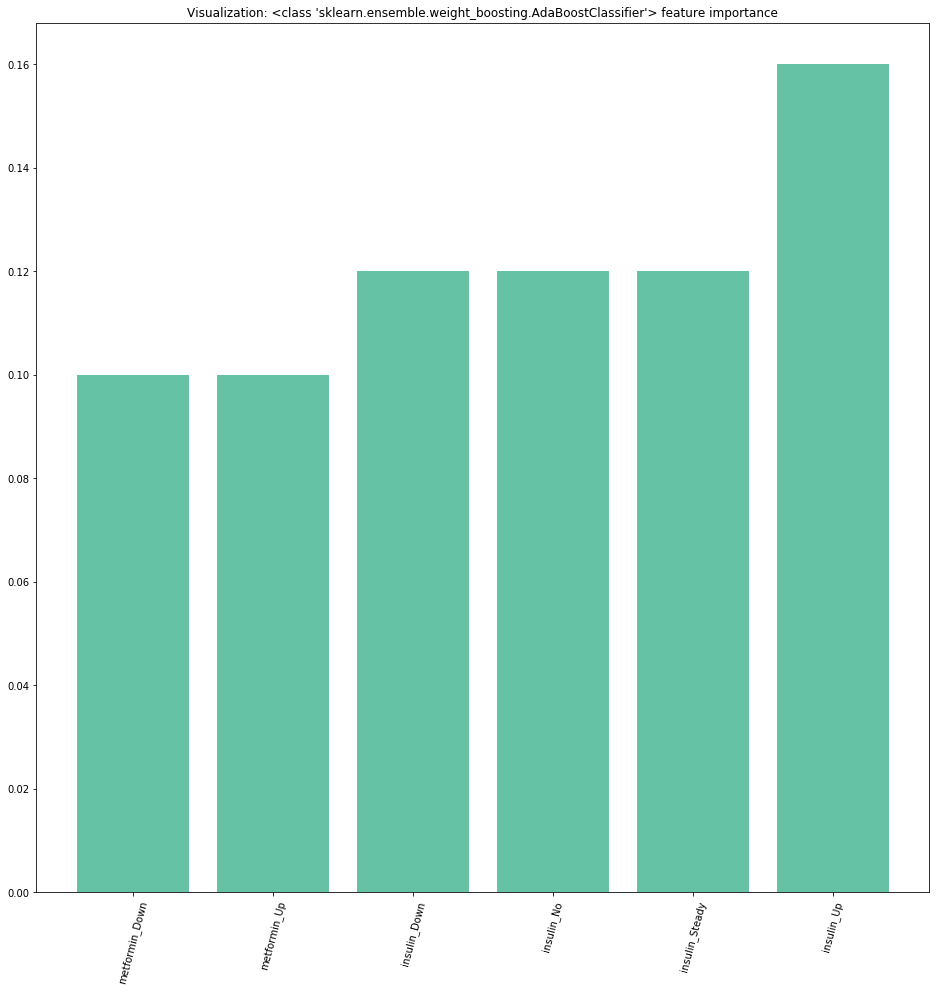

In [24]:
show_feature_importance(classifier_type=AdaBoostClassifier, X_train=X_train, \
                       X_test=X_test, y_train=y_train, y_test=y_test, drop=drop_test)

Train Performance: 0.5392539999801119
Test Performance: 0.5266666666666666
Classifier Feature Importances: <zip object at 0x11fab0148>


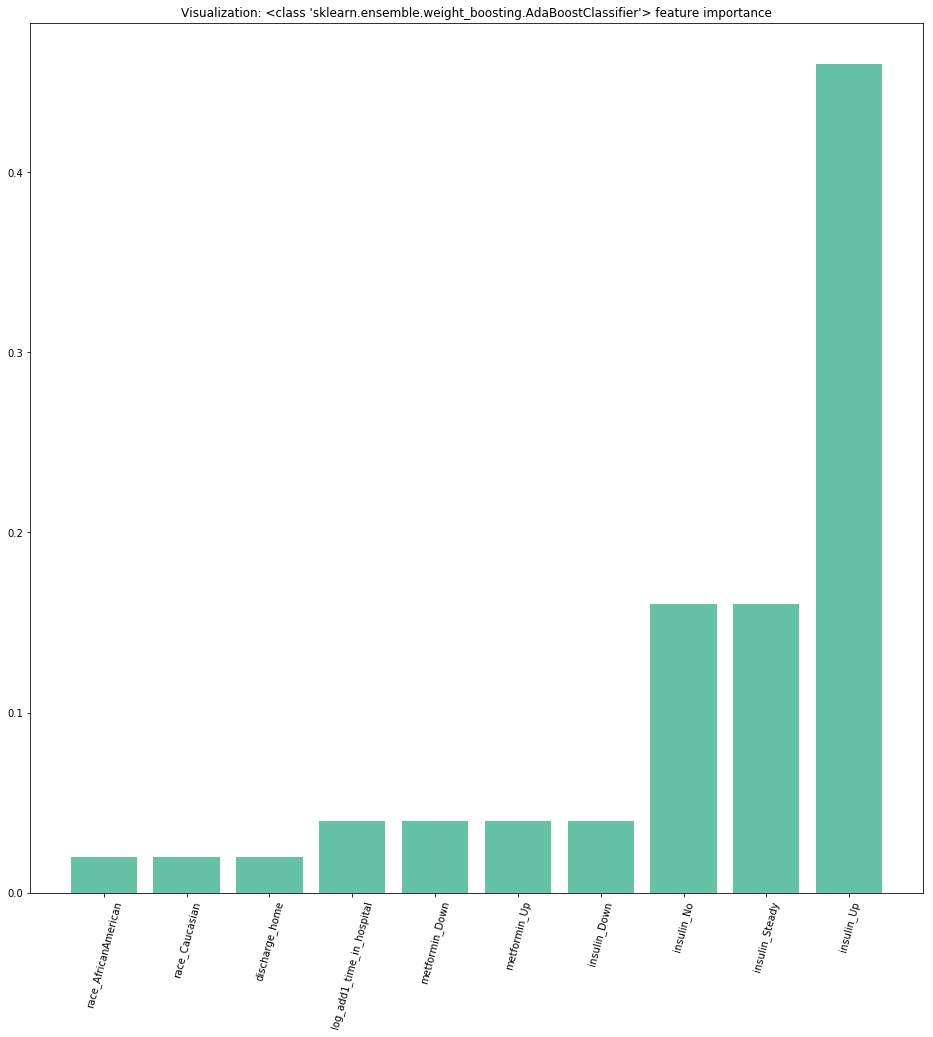

In [25]:
show_feature_importance(classifier_type=AdaBoostClassifier, X_train=X_train, \
                       X_test=X_test, y_train=y_train, y_test=y_test, drop=(['gender', \
                       'num_medications', 'age', 'num_procedures', \
                       'num_lab_procedures', 'number_outpatient', 'number_emergency', \
                       'number_inpatient', 'change', 'diabetesMed', 'ad_id_2', 'ad_id_3', \
                       'number_diagnoses']))

Train Performance: 0.5392539999801119
Test Performance: 0.5266666666666666
Classifier Feature Importances: <zip object at 0x1a42a5ac08>


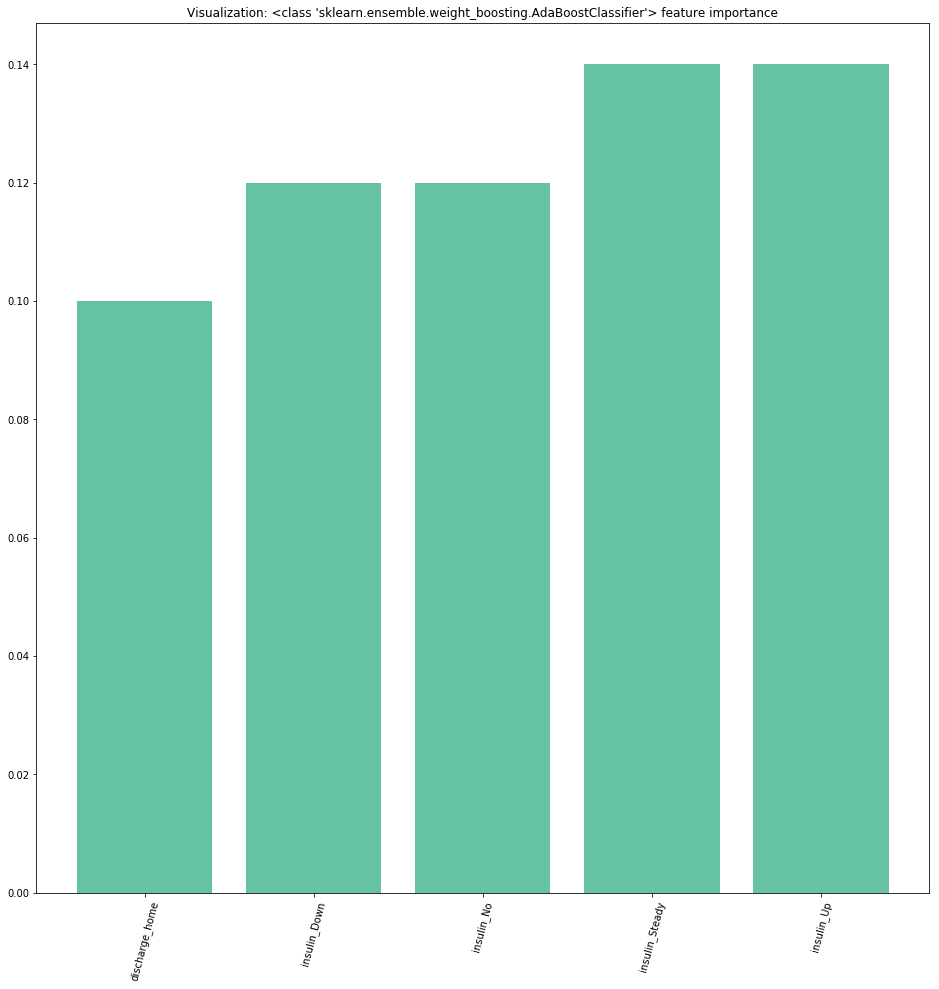

In [26]:
show_feature_importance(classifier_type=AdaBoostClassifier, X_train=X_train, \
                       X_test=X_test, y_train=y_train, y_test=y_test, drop=(['gender', \
                       'num_medications', 'age', 'num_procedures', \
                       'num_lab_procedures', 'number_outpatient', 'number_emergency', \
                       'number_inpatient', 'change', 'diabetesMed', 'ad_id_2', 'ad_id_3', \
                       'number_diagnoses', 'race_AfricanAmerican', 'race_Caucasian', \
                       'log_add1_time_in_hospital', 'metformin_Down', 'metformin_Up']))

Train Performance: 0.5697177746914389
Test Performance: 0.5648755945127943
Classifier Feature Importances: <zip object at 0x1a5be99e88>


<Figure size 432x288 with 0 Axes>

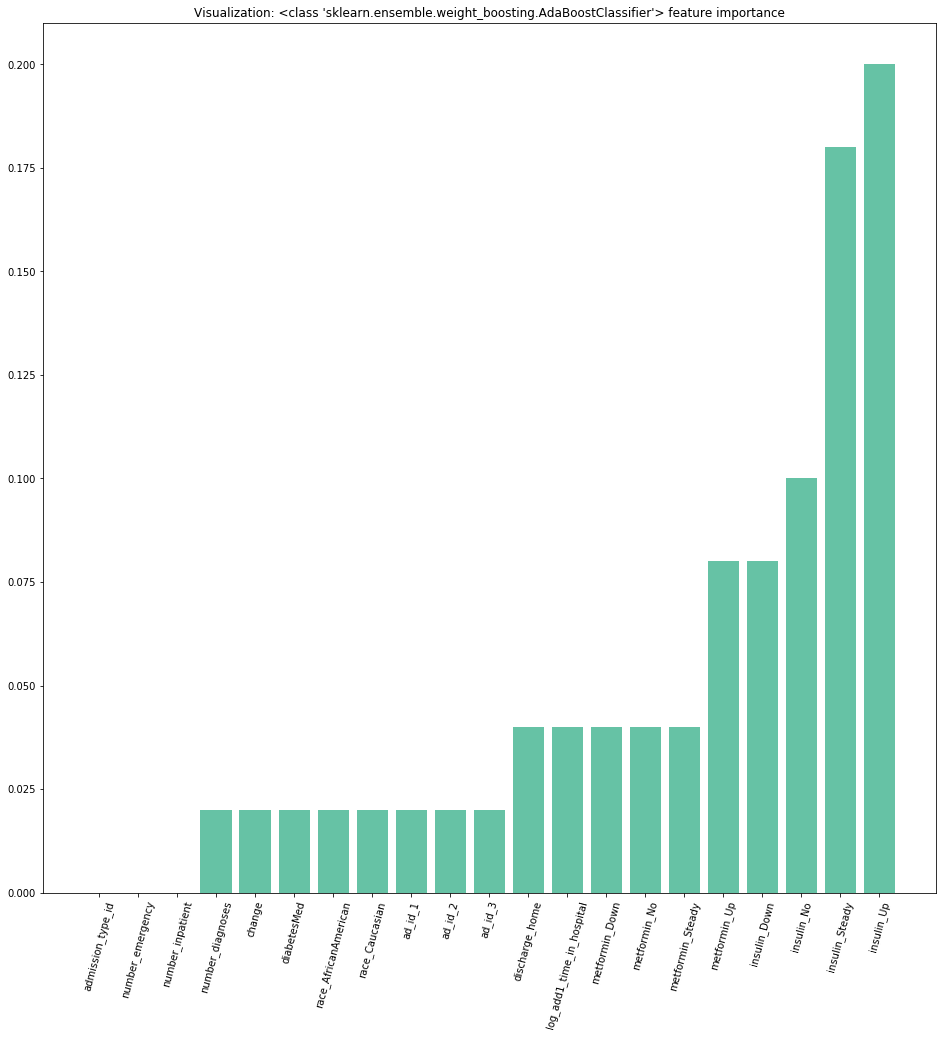

In [189]:
fig = plt.figure()
show_feature_importance(classifier_type=AdaBoostClassifier, X_train=X_train, \
                       X_test=X_test, y_train=y_train, y_test=y_test, drop=(['gender', \
                       'num_medications', 'age', 'num_procedures', \
                       'num_lab_procedures', 'number_outpatient']))
fig.savefig('img/ensemble_feat_importance')

As seen in all of the feature importance visualizations above, the most significant predictor in hospital readmission amongst patients in the dataset are all related to changes in insulin dosage. However, as removing additional features does not improve the accuracy of the baseline model, we'll select this subset of features for classification.

In [28]:
X_norm_tree = X_normalized.drop(['gender', 'num_medications', 'age', \
                'num_procedures', 'num_lab_procedures', 'number_outpatient'], axis=1)
X_norm_tree.head()

,admission_type_id,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed,race_AfricanAmerican,race_Caucasian,ad_id_1,ad_id_2,...,discharge_home,log_add1_time_in_hospital,metformin_Down,metformin_No,metformin_Steady,metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,0.714286,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.0,0.0,0.533333,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.344010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.0,1.0,0.333333,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.201233,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.0,0.0,0.400000,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.201233,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.0,0.266667,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Comparing Machine Learning Techniques:

In [29]:
# Creating a smaller train set to improve runtime:
X_train, X_test, y_train, y_test = train_test_split(X_norm_tree, y_labels_vec, test_size=.35, random_state=123)

In [30]:
#pipe_svm = Pipeline([('clf', svm.SVC(random_state=123, degree=3))])
        
pipe_tree = Pipeline([('clf', tree.DecisionTreeClassifier(random_state=123))])

pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=123))])

# List of pipelines, List of pipeline names
pipelines = [pipe_tree, pipe_rf]
pipeline_names = ['Decision Tree','Random Forest']

# Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

# Compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'))])
Pipeline(memory=None,
     steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False))])


/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Decision Tree pipeline test accuracy: 0.506
Random Forest pipeline test accuracy: 0.509


In [31]:
# Construct pipeline
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [2, 4, 10, 25, 50, 75],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [3, 4, 5, 6, 7],  
   'clf__min_samples_leaf':[0.001 ,0.01, 0.05],  
   'clf__min_samples_split':[0.001 ,0.01, 0.05]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, cl

[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=75, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=75, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min

[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=3, clf_

[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=25 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=3, clf__min_sampl

[CV]  clf__criterion=entropy, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=75, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=75, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=4, clf_

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=4, clf_

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=75, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=75 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=75, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_sam

[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=25 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf_

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.05, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sample

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=entropy, clf__max_depth=5, clf_

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=75, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=75 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=75, total=   0.9s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf_

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples

[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=75, total=   1.1s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=75 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=75, total=   1.1s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__

[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=50 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=entropy, clf__max_depth=7, clf_

[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=25 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=4 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_

[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=75, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.01, clf__n_estimators=75, total=   0.8s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=2 
[CV]  clf__criterion=entropy, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=entropy, clf__max_depth=7, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf

[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.001,

[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.01, clf__min_s

[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=4, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf

[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=4, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=4, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=3, clf__min_samples_leaf=0.05, clf__min_s

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.001, clf_

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=75, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__m

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75, total=   0.9s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.01, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, 

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.001, clf_

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=75, total=   0.8s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__m

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75, total=   1.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75, total=   1.0s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.01, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, 

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.001, clf_

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=75, total=   0.9s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__m

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.6s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75, total=   1.0s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75, total=   1.0s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.01, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, 

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.05, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=4, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.01, clf__n_estimators=10, total=   0.2s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.001, clf_

[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.001, clf__min_samples_split=0.05, clf__n_estimators=75, total=   1.1s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.001, clf__n_estimators=2, total=   0.0s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__m

[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=50, total=   0.7s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75, total=   1.0s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__min_samples_split=0.01, clf__n_estimators=75, total=   1.0s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.01, clf__mi

[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.001, clf__n_estimators=50, total=   0.5s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, 

[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=10, total=   0.1s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25 
[CV]  clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=25, total=   0.3s
[CV] clf__criterion=gini, clf__max_depth=7, clf__min_samples_leaf=0.05, clf__mi

[Parallel(n_jobs=1)]: Done 1620 out of 1620 | elapsed: 10.8min finished


Best accuracy: 0.569

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__min_samples_leaf': 0.001, 'clf__min_samples_split': 0.001, 'clf__n_estimators': 10}


In [32]:
rf_model = RandomForestClassifier(random_state=123, n_estimators=10, criterion='gini', \
                                  min_samples_split=.001, max_depth=7, min_samples_leaf=.001)

rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.001, min_samples_split=0.001,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [33]:
# Predict:
y_hat_train = rf_model.predict(X_train)
y_hat_test = rf_model.predict(X_test)

# Score (accuracy):
print(f'Train Score: {rf_model.score(X_train, y_train)}, Test Score: {rf_model.score(X_test, y_test)}') 

Train Score: 0.5713357018671101, Test Score: 0.5626368689988208


In [34]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[16619  2829  9273]
 [    0     0     0]
 [ 2337  1139  3421]]


Confusion Matrix, without Normalization
[[16619  2829  9273]
 [    0     0     0]
 [ 2337  1139  3421]]


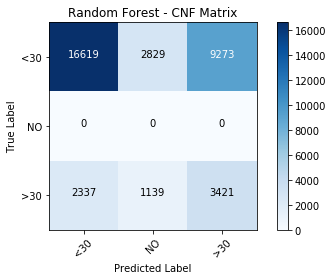

In [35]:
# Visualizing Normalized CNF Matrix:
class_names = set(y)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, normalize=False, title='Random Forest - CNF Matrix')
plt.show()

As seen by the confusion matrix above, it appears that the Random Forest Classifier does not predict the smallest target class, representing patients that did not return to the hospital.

Despite likely producing a more "accurate" result, failing to predict the minority class represents poor model recall

In [36]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average='weighted')
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))

In [37]:
display_acc_and_f1_score(true=y_test, preds=y_hat_test, model_name=rf_model)

Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.001, min_samples_split=0.001,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)
Accuracy: 0.5626368689988208
F1-Score: 0.4954923118430795


/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from sklearn import metrics

In [39]:
# ASK RAF ABOUT THIS:

# ROC/AUC:
#Initial Model:
#logreg = LogisticRegression(fit_intercept = False)
#model_log = logreg.fit(X_train, y_train)

# Probability scores for test set:
#y_score = rf_model.fit(X_train, y_train).decision_function(X_test)

# False Positive Rate (fpr) and True Positive Rate (tpr):
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_hat_test, pos_label='white')

sns.set_style('whitegrid')

# Print AUC, Plot ROC Curve:
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="best")
plt.show()

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/ranking.py:421: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = (y_true == pos_label)


TypeError: 'bool' object is not subscriptable

Results: 

Next, let's attempt to predict readmission rate using Deep Learning.

## Creating a Baseline Deep Learning Model:

To begin, let's fit a simple DL model in order to determine whether our model predicts the minority class.

In [40]:
# Train/Test Split:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=.35)
show_input_shapes(X_train, X_test, y_train, y_test)

X_train Shape: (66145, 27), X_test Shape: (35618, 27)
y_train Shape: (66145, 3), y_test Shape: (35618, 3)


In [41]:
model_base = models.Sequential()
model_base.add(layers.Dense(64, input_shape=(27,), activation='relu'))
model_base.add(layers.Dense(32, activation='relu'))
model_base.add(layers.Dense(4, activation='relu'))             
model_base.add(layers.Dense(3, activation='softmax'))

model_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_base.fit(X_train, y_train, epochs=128, batch_size=256)

W1009 11:12:06.719681 4736992704 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1009 11:12:06.839127 4736992704 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1009 11:12:06.861515 4736992704 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1009 11:12:06.940006 4736992704 deprecation_wrapper.py:119] From /Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.comp

Epoch 1/128
66145/66145 [==============================] - 1s 11us/step - loss: 0.9379 - acc: 0.5480
Epoch 2/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.9087 - acc: 0.5664
Epoch 3/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.9061 - acc: 0.5674
Epoch 4/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.9041 - acc: 0.5687
Epoch 5/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.9032 - acc: 0.5700
Epoch 6/128
66145/66145 [==============================] - 0s 6us/step - loss: 0.9018 - acc: 0.5704
Epoch 7/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.9011 - acc: 0.5720
Epoch 8/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.9008 - acc: 0.5716
Epoch 9/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.9000 - acc: 0.5721
Epoch 10/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.8992 - acc: 0.572

66145/66145 [==============================] - 0s 5us/step - loss: 0.8765 - acc: 0.5878
Epoch 83/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.8764 - acc: 0.5879
Epoch 84/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.8762 - acc: 0.5879
Epoch 85/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.8760 - acc: 0.5890
Epoch 86/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.8758 - acc: 0.5889
Epoch 87/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.8758 - acc: 0.5885
Epoch 88/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.8752 - acc: 0.5900
Epoch 89/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.8751 - acc: 0.5894
Epoch 90/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.8749 - acc: 0.5886
Epoch 91/128
66145/66145 [==============================] - 0s 5us/step - loss: 0.8749 - acc: 0.5888
Epo

In [42]:
model_base.evaluate(X_train, y_train)
model_base.evaluate(X_test, y_test)

#pd.DataFrame(np.argmax(model_l2.predict(X_test), axis=1))[0].value_counts()
#y_test_two = y_test.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

y_hat_train = model_base.predict(X_train)
y_hat_test = model_base.predict(X_test)
y_hat_train = y_hat_train.argmax(axis=1)

#display(y_train.head())
#y_hat_train

y_train_fix = y_train.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

cnf_matrix = confusion_matrix(y_true=y_train_fix, y_pred=y_hat_train)
print('Confusion Matrix:\n', cnf_matrix)

35618/35618 [==============================] - 0s 12us/step
Confusion Matrix:
 [[   69  5050 30484]
 [  129  2822  4413]
 [   80  8837 14261]]


In [43]:
# Can delete this after getting below to work:
display(y_hat_train[:10])
display(y_train_fix.head())
display(y_train_fix.unique())

array([2, 1, 2, 2, 2, 2, 1, 2, 2, 2])

49618    0
75529    1
66442    2
55792    0
45860    0
dtype: int64

array([0, 1, 2])

Confusion Matrix, without Normalization
[[   69  5050 30484]
 [  129  2822  4413]
 [   80  8837 14261]]


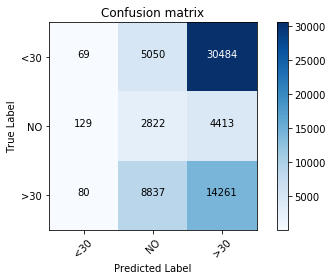

In [44]:
class_names = set(y)

plot_confusion_matrix(cm=cnf_matrix, classes=class_names,
                          normalize=False,
                          title='Confusion matrix')

As shown by the confusion matrix above, though the base Deep Learning Model does predict the minority class, it does so extremely rarely. In order to increase the recall of the model, the minority class can be oversampled using SMOTE.

In a real-world scenario, obtaining additional data is preferable to generating it. In a future experiment, this process should be repeated as the sample population increases with the addition of new patient records.
<br>
<br>

## Smote: 

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
y_new_new = y.idxmax(axis=1).replace({"NO": 0, "<30": 1, ">30": 2})

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_new_new, \
                                    stratify=y_new_new, test_size=0.25)

show_input_shapes(X_test=X_test, X_train=X_train, y_test=y_test, y_train=y_train)

X_train Shape: (76322, 27), X_test Shape: (25441, 27)
y_train Shape: (76322,), y_test Shape: (25441,)


In [46]:
smote.fit(X_train, y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

X_train_smote = pd.DataFrame(data=X_train_smote)
y_train_smote = pd.DataFrame(data=y_train_smote)

display(X_train_smote.head())
display(np.unique(y_train_smote.head()))

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.0,0.111111,0.285714,0.244275,0.333333,0.2000,0.000000,0.0,1.0,0.400000,...,1.0,0.344010,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.555556,0.000000,0.480916,0.000000,0.1375,0.000000,0.0,0.0,0.533333,...,1.0,0.545243,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.888889,0.000000,0.259542,0.000000,0.0875,0.190476,1.0,1.0,0.533333,...,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.666667,0.142857,0.175573,0.833333,0.1125,0.000000,0.0,0.0,0.266667,...,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.666667,0.714286,0.534351,0.833333,0.2750,0.000000,0.0,0.0,0.400000,...,1.0,0.545243,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


array([0, 2])

In [47]:
unique, counts = np.unique(y_train_smote, return_counts=True)
unique, counts

(array([0, 1, 2]), array([41145, 41145, 41145]))

In [48]:
y_train_smote[0].unique()

array([0, 2, 1])

In [49]:
# Can delete this after getting below to work:
display(y_hat_train[:10])
display(y_train_smote.head())
display(y_train_smote[0].unique())

array([2, 1, 2, 2, 2, 2, 1, 2, 2, 2])

,0
0,0
1,0
2,0
3,0
4,2


array([0, 2, 1])

In [50]:
y_train_smote_ohe = y_train_smote.replace({0: 'NO', 1: '<30', 2: '>30'})
#y_train_smote_ohe.rename(columns={0: ''}, inplace=True)
#y_train_smote[0].idxmax(axis=1).replace({0: 'NO', 1: '<30', 2: '>30'})
y_train_smote_fit = pd.get_dummies(y_train_smote_ohe)

y_train_smote_fit.head()

,0_<30,0_>30,0_NO
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


In [51]:
model_smote = models.Sequential()
model_smote.add(layers.Dense(64, input_shape=(27,), activation='relu'))
model_smote.add(layers.Dense(32, activation='relu'))
model_smote.add(layers.Dense(4, activation='relu'))          
model_smote.add(layers.Dense(3, activation='softmax'))

model_smote.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_smote.fit(X_train_smote, y_train_smote_fit, epochs=64, batch_size=512)

Epoch 1/64
123435/123435 [==============================] - 1s 6us/step - loss: 1.0795 - acc: 0.4032
Epoch 2/64
123435/123435 [==============================] - 0s 3us/step - loss: 1.0581 - acc: 0.4354
Epoch 3/64
123435/123435 [==============================] - 0s 3us/step - loss: 1.0526 - acc: 0.4399
Epoch 4/64
123435/123435 [==============================] - 0s 3us/step - loss: 1.0490 - acc: 0.4438
Epoch 5/64
123435/123435 [==============================] - 0s 3us/step - loss: 1.0460 - acc: 0.4476
Epoch 6/64
123435/123435 [==============================] - 0s 3us/step - loss: 1.0429 - acc: 0.4519
Epoch 7/64
123435/123435 [==============================] - 0s 3us/step - loss: 1.0401 - acc: 0.4557
Epoch 8/64
123435/123435 [==============================] - 0s 3us/step - loss: 1.0375 - acc: 0.4581
Epoch 9/64
123435/123435 [==============================] - 0s 3us/step - loss: 1.0344 - acc: 0.4627
Epoch 10/64
123435/123435 [==============================] - 0s 3us/step - loss: 1.0313 - a

In [52]:
#y_test = y_test.replace({0: 'NO', 1: '<30', 2: '>30'})
#y_test.rename(columns={0: 'Readmit'}, inplace=True)
#ytrain_smote[0].idxmax(axis=1).replace({0: 'NO', 1: '<30', 2: '>30'})
y_test_scoring = pd.get_dummies(y_test)
y_test_scoring = y_test.replace({0: 'NO', 1: '<30', 2: '>30'})

y_test_scoring.head()

SyntaxError: unexpected EOF while parsing (<ipython-input-52-3909c82d8935>, line 6)

In [ ]:
print(f'Train Score: {model_smote.evaluate(X_train_smote, y_train_smote_fit)} \n')
print(f'Test Score: {model_smote.evaluate(X_test, y_test_scoring)}')

In [ ]:
# Can delete this after getting below to work:
display(y_hat_train[:10])
display(y_train_fix.head())
display(y_train_fix.unique())

In [ ]:
y_hat_train = model_base.predict(X_train_smote)
y_hat_test = model_base.predict(X_test)
y_hat_train = y_hat_train.argmax(axis=1)

#display(y_train.head())
#y_hat_train

#y_train_fix = y_train.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

cnf_matrix = confusion_matrix(y_true=y_train_smote_fit, y_pred=y_hat_train)
print('Confusion Matrix:\n', cnf_matrix)

In [ ]:
y_hat_train

In [ ]:
y_train_fix

In [ ]:
y_train_fix.unique()

As seen by the results of the SMOTE oversampled model above, the predictive accuracy of the model technically does decrease. However, the overall recall ability of the model, as represented by its f1 score, shows decided improvement.

In [53]:
model_base.evaluate(X_train, y_train)
model_base.evaluate(X_test, y_test)

#pd.DataFrame(np.argmax(model_l2.predict(X_test), axis=1))[0].value_counts()
#y_test_two = y_test.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

y_hat_train = model_base.predict(X_train)
y_hat_test = model_base.predict(X_test)
y_hat_train = y_hat_train.argmax(axis=1)

#display(y_train.head())
#y_hat_train

y_train_fix = y_train.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

cnf_matrix = confusion_matrix(y_true=y_train_fix, y_pred=y_hat_train)
print('Confusion Matrix:\n', cnf_matrix)

ValueError: Error when checking target: expected dense_4 to have shape (3,) but got array with shape (1,)

## Tuning: Batch Size and Number of Epochs for Neural Networks

In [54]:
# Train/Test Split:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=.25)

In [55]:
show_input_shapes(X_train, X_test, y_train, y_test)

X_train Shape: (76322, 27), X_test Shape: (25441, 27)
y_train Shape: (76322, 3), y_test Shape: (25441, 3)


In [57]:
# Tune Batch Size, Number of Epochs:

# Use scikit-learn to grid search the batch size and epochs
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
#seed = 123

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

# Define grid search parameters:
batch_size = [32, 64, 128, 256]
epochs = [50, 100, 150, 250]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# summarize results:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/50
76322/76322 [==============================] - 1s 19us/step - loss: 1.0106 - acc: 0.5333
Epoch 2/50
76322/76322 [==============================] - 1s 11us/step - loss: 0.9128 - acc: 0.5578
Epoch 3/50
76322/76322 [==============================] - 1s 10us/step - loss: 0.9073 - acc: 0.5686
Epoch 4/50
76322/76322 [==============================] - 1s 10us/step - loss: 0.9052 - acc: 0.5697
Epoch 5/50
76322/76322 [==============================] - 1s 10us/step - loss: 0.9037 - acc: 0.5713
Epoch 6/50
76322/76322 [==============================] - 1s 10us/step - loss: 0.9026 - acc: 0.5708
Epoch 7/50
76322/76322 [==============================] - 1s 10us/step - loss: 0.9015 - acc: 0.5723
Epoch 8/50
76322/76322 [==============================] - 1s 9us/step - loss: 0.9010 - acc: 0.5728
Epoch 9/50
76322/76322 [==============================] - 1s 10us/step - loss: 0.9002 - acc: 0.5729
Epoch 10/50
76322/76322 [==============================] - 1s 10us/step - loss: 0.8997 - acc: 0.5731


## Tune Training Optimization Algorithm:

In [63]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=128, verbose=2)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/50
 - 2s - loss: 0.9274 - acc: 0.5537
Epoch 2/50
 - 1s - loss: 0.9080 - acc: 0.5682
Epoch 3/50
 - 1s - loss: 0.9052 - acc: 0.5696
Epoch 4/50
 - 1s - loss: 0.9038 - acc: 0.5700
Epoch 5/50
 - 1s - loss: 0.9028 - acc: 0.5706
Epoch 6/50
 - 1s - loss: 0.9020 - acc: 0.5720
Epoch 7/50
 - 1s - loss: 0.9016 - acc: 0.5716
Epoch 8/50
 - 1s - loss: 0.9012 - acc: 0.5718
Epoch 9/50
 - 1s - loss: 0.9007 - acc: 0.5716
Epoch 10/50
 - 1s - loss: 0.9001 - acc: 0.5731
Epoch 11/50
 - 1s - loss: 0.8998 - acc: 0.5727
Epoch 12/50
 - 1s - loss: 0.8992 - acc: 0.5738
Epoch 13/50
 - 1s - loss: 0.8989 - acc: 0.5734
Epoch 14/50
 - 1s - loss: 0.8984 - acc: 0.5747
Epoch 15/50
 - 1s - loss: 0.8983 - acc: 0.5752
Epoch 16/50
 - 1s - loss: 0.8977 - acc: 0.5736
Epoch 17/50
 - 1s - loss: 0.8978 - acc: 0.5749
Epoch 18/50
 - 1s - loss: 0.8967 - acc: 0.5754
Epoch 19/50
 - 1s - loss: 0.8971 - acc: 0.5748
Epoch 20/50
 - 1s - loss: 0.8964 - acc: 0.5757
Epoch 21/50
 - 1s - loss: 0.8963 - acc: 0.5753
Epoch 22/50
 - 1s - lo

## Tune Learning Rate, Momentum:

In [66]:
# create model
# Function to create model, required for KerasClassifier
def create_model(learn_rate=.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=256, verbose=2)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/50
 - 1s - loss: 0.9239 - acc: 0.5554
Epoch 2/50
 - 1s - loss: 0.9094 - acc: 0.5669
Epoch 3/50
 - 1s - loss: 0.9069 - acc: 0.5674
Epoch 4/50
 - 1s - loss: 0.9061 - acc: 0.5683
Epoch 5/50
 - 1s - loss: 0.9051 - acc: 0.5700
Epoch 6/50
 - 1s - loss: 0.9043 - acc: 0.5693
Epoch 7/50
 - 1s - loss: 0.9041 - acc: 0.5693
Epoch 8/50
 - 1s - loss: 0.9037 - acc: 0.5703
Epoch 9/50
 - 1s - loss: 0.9030 - acc: 0.5704
Epoch 10/50
 - 1s - loss: 0.9032 - acc: 0.5694
Epoch 11/50
 - 1s - loss: 0.9028 - acc: 0.5712
Epoch 12/50
 - 1s - loss: 0.9023 - acc: 0.5714
Epoch 13/50
 - 1s - loss: 0.9021 - acc: 0.5720
Epoch 14/50
 - 1s - loss: 0.9014 - acc: 0.5715
Epoch 15/50
 - 1s - loss: 0.9017 - acc: 0.5716
Epoch 16/50
 - 1s - loss: 0.9014 - acc: 0.5716
Epoch 17/50
 - 1s - loss: 0.9011 - acc: 0.5718
Epoch 18/50
 - 1s - loss: 0.9010 - acc: 0.5724
Epoch 19/50
 - 1s - loss: 0.9003 - acc: 0.5728
Epoch 20/50
 - 1s - loss: 0.9003 - acc: 0.5720
Epoch 21/50
 - 1s - loss: 0.9000 - acc: 0.5720
Epoch 22/50
 - 1s - lo

## Tune Weight Initialization:

In [67]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=256, verbose=2)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/50
 - 2s - loss: 0.9413 - acc: 0.5458
Epoch 2/50
 - 1s - loss: 0.9099 - acc: 0.5664
Epoch 3/50
 - 1s - loss: 0.9067 - acc: 0.5689
Epoch 4/50
 - 1s - loss: 0.9053 - acc: 0.5698
Epoch 5/50
 - 1s - loss: 0.9040 - acc: 0.5699
Epoch 6/50
 - 1s - loss: 0.9031 - acc: 0.5710
Epoch 7/50
 - 1s - loss: 0.9024 - acc: 0.5707
Epoch 8/50
 - 1s - loss: 0.9018 - acc: 0.5720
Epoch 9/50
 - 1s - loss: 0.9013 - acc: 0.5724
Epoch 10/50
 - 1s - loss: 0.9005 - acc: 0.5734
Epoch 11/50
 - 1s - loss: 0.9003 - acc: 0.5733
Epoch 12/50
 - 1s - loss: 0.8999 - acc: 0.5735
Epoch 13/50
 - 1s - loss: 0.8993 - acc: 0.5741
Epoch 14/50
 - 1s - loss: 0.8987 - acc: 0.5744
Epoch 15/50
 - 1s - loss: 0.8987 - acc: 0.5749
Epoch 16/50
 - 1s - loss: 0.8981 - acc: 0.5747
Epoch 17/50
 - 1s - loss: 0.8975 - acc: 0.5749
Epoch 18/50
 - 1s - loss: 0.8971 - acc: 0.5758
Epoch 19/50
 - 1s - loss: 0.8971 - acc: 0.5750
Epoch 20/50
 - 1s - loss: 0.8968 - acc: 0.5756
Epoch 21/50
 - 1s - loss: 0.8962 - acc: 0.5756
Epoch 22/50
 - 1s - lo

## Tune Droprate Regularization:

In [68]:
# Use scikit-learn to grid search the dropout rate
from keras.constraints import maxnorm

# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=256, verbose=2)

# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/50
 - 2s - loss: 0.9413 - acc: 0.5458
Epoch 2/50
 - 1s - loss: 0.9099 - acc: 0.5666
Epoch 3/50
 - 1s - loss: 0.9068 - acc: 0.5685
Epoch 4/50
 - 1s - loss: 0.9053 - acc: 0.5698
Epoch 5/50
 - 1s - loss: 0.9040 - acc: 0.5700
Epoch 6/50
 - 1s - loss: 0.9032 - acc: 0.5714
Epoch 7/50
 - 1s - loss: 0.9025 - acc: 0.5710
Epoch 8/50
 - 1s - loss: 0.9018 - acc: 0.5714
Epoch 9/50
 - 1s - loss: 0.9013 - acc: 0.5728
Epoch 10/50
 - 1s - loss: 0.9003 - acc: 0.5735
Epoch 11/50
 - 1s - loss: 0.9001 - acc: 0.5737
Epoch 12/50
 - 1s - loss: 0.8996 - acc: 0.5736
Epoch 13/50
 - 1s - loss: 0.8991 - acc: 0.5737
Epoch 14/50
 - 1s - loss: 0.8984 - acc: 0.5744
Epoch 15/50
 - 1s - loss: 0.8984 - acc: 0.5753
Epoch 16/50
 - 1s - loss: 0.8976 - acc: 0.5744
Epoch 17/50
 - 1s - loss: 0.8972 - acc: 0.5749
Epoch 18/50
 - 1s - loss: 0.8967 - acc: 0.5752
Epoch 19/50
 - 1s - loss: 0.8968 - acc: 0.5754
Epoch 20/50
 - 1s - loss: 0.8965 - acc: 0.5755
Epoch 21/50
 - 1s - loss: 0.8958 - acc: 0.5752
Epoch 22/50
 - 1s - lo

In [ ]:
# Why did I need this again?

In [ ]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 12, kernel_initializer = 'normal', 
        activation = 'relu', input_dim = 25))
    #classifier.add(Dense(units = 6, kernel_initializer = 'normal', 
    #    activation = 'relu'))
    classifier.add(Dense(units = 3, kernel_initializer = 'normal', 
        activation = 'softmax'))
    classifier.compile(optimizer = optimizer, loss = 
        'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [64, 128],
          'epochs': [25, 50],
          'optimizer': ['adam']}


grid_search = GridSearchCV(estimator = classifier,
                       param_grid = parameters,
                       scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)    

'''
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
'''

In [ ]:
X_test, y_test

In [ ]:
y_train[:5]

In [ ]:
#Predict and evaluate performance: 
pred_labels = classifier.predict(X_train)
print(f'Train Performance: {classifier.score(X_train, y_train)}')
print(f'Test Performance: {classifier.score(X_test, y_test)}')
    
#Define, plot feature importance: 
features, scores = X_test.columns, classifier.coef_[0]
    
plt.figure(figsize=(16,16))
plt.bar(features, sorted(scores))
plt.title(f'Visualization: {classifier_type} feature importance')
plt.xticks(rotation=75)
plt.show()

In [ ]:
y_train[:5]

In [ ]:
# Not sure what to do with above:

In [70]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

In [71]:
def create_model(dropout_rate=0.8, weight_constraint=4):
    adam = optimizers.Adam(lr=0.3)
    
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    print(model.summary())
    return model

# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

# create model
classifier = KerasClassifier(build_fn=create_model, epochs=50, batch_size=128, verbose=2)

classifier.fit(X_train, y_train)

perm = PermutationImportance(classifier, random_state=123).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                896       
_________________________________________________________________
dense_32 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 27        
Total params: 1,587
Trainable params: 1,587
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
 - 1s - loss: 0.9676 - acc: 0.5346
Epoch 2/50
 - 1s - loss: 0.9510 - acc: 0.5371
Epoch 3/50
 - 1s - loss: 0.9517 - acc: 0.5334
Epoch 4/50
 - 1s - loss: 0.9516 - acc: 0.5381
Epoch 5/50
 - 1s - loss: 0.9515 - acc: 0.5371
Epoch 6/50
 - 1s - loss: 0.9519 - acc

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/eli5/formatters/html.py:235: RuntimeWarning: invalid value encountered in double_scalars
  rel_weight = (abs(weight) / weight_range) ** 0.7


Weight,Feature
0 ± 0.0000,insulin_Steady
0 ± 0.0000,num_lab_procedures
0 ± 0.0000,num_procedures
0 ± 0.0000,num_medications
0 ± 0.0000,number_outpatient
0 ± 0.0000,number_emergency
0 ± 0.0000,number_inpatient
0 ± 0.0000,number_diagnoses
0 ± 0.0000,change
0 ± 0.0000,diabetesMed


In [72]:
classifier.score(X_train, y_train)

0.5392023269838265

In [73]:
classifier.score(X_test, y_test)

0.5388152980377106

In [74]:
y_hat_train = classifier.predict(X_train)
y_hat_test = classifier.predict(X_test)

In [75]:
display(y_train.head(10))
display(y_test.head(10))
display(y_two.head(10))

,<30,>30,NO
8014,0,0,1
42963,1,0,0
48287,0,0,1
35702,0,1,0
34018,0,0,1
16004,0,0,1
61508,0,0,1
58915,0,1,0
98264,0,0,1
193,0,0,1


,<30,>30,NO
49615,0,1,0
99646,0,1,0
39794,0,1,0
16366,0,0,1
7029,0,1,0
76931,0,1,0
47618,0,0,1
49169,0,1,0
14065,0,1,0
39363,0,0,1


,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO
5,>30
6,NO
7,>30
8,NO
9,NO


In [76]:
display(y_train[:5])
display(y_hat_train[:20])

,<30,>30,NO
8014,0,0,1
42963,1,0,0
48287,0,0,1
35702,0,1,0
34018,0,0,1


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [124]:
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_hat_train, labels=["NO", "<30", ">30"])
print('Confusion Matrix:\n', cnf_matrix)

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:261: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

In [78]:
cnf_matrix = confusion_matrix(y_true=y_train.NO, y_pred=y_hat_train)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    0     0 35169]
 [    0     0 41153]
 [    0     0     0]]


In [ ]:
cnf

In [79]:
features, scores = X_test.columns, 
    
plt.figure(figsize=(16,16))
plt.bar(features, sorted(scores))
plt.title(f'Visualization: {classifier_type} feature importance')
plt.xticks(rotation=75)
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
''' fix random seed for reproducibility
seed = 123
np.random.seed(seed)

# create model
model = (build_fn=create_model, epochs=256, batch_size=64, verbose=2)
model.fit(X_train, y_train)
'''

In [80]:
#Predict and evaluate performance: 
pred_labels = model.predict(X_train)
print(f'Train Performance: {model.evaluate(X_train, y_train)}')
print(f'Test Performance: {model.evaluate(X_test, y_test)}')
    
#Define, plot feature importance: 
features, scores = X_test.columns, model.features_importance_
    
plt.figure(figsize=(16,16))
plt.bar(features, sorted(scores))
plt.title(f'Visualization: {classifier_type} feature importance')
plt.xticks(rotation=75)
plt.show()

AttributeError: 'KerasClassifier' object has no attribute 'model'

In [ ]:
# Don't know if I still need this

In [ ]:
model_1layer = models.Sequential()
model_1layer.add(layers.Dense(64, input_shape=(25,), activation='relu', \
                       kernel_regularizer=regularizers.l2(.005)))
model_1layer.add(layers.Dense(3, activation='softmax'))

model_1layer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_1layer.fit(X_train, y_train, epochs=128, batch_size=32)

In [81]:
#X_normalized = preprocessing.normalize(X)
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_normalized = pd.DataFrame(x_scaled, columns=X.columns)
display(X_normalized.head())

y_new_fix = y.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})
y_new_fix.value_counts()

,gender,age,admission_type_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,discharge_home,log_add1_time_in_hospital,metformin_Down,metformin_No,metformin_Steady,metformin_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,1.0,0.000000,0.714286,0.305344,0.000000,0.0000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.111111,0.000000,0.442748,0.000000,0.2125,0.000000,0.0,0.0,0.533333,...,1.0,0.344010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.222222,0.000000,0.076336,0.833333,0.1500,0.047619,0.0,1.0,0.333333,...,1.0,0.201233,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.333333,0.000000,0.328244,0.166667,0.1875,0.000000,0.0,0.0,0.400000,...,1.0,0.201233,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.444444,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.0,0.266667,...,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


0    54861
2    35545
1    11357
dtype: int64

In [82]:
# Creating a smaller train set to improve runtime:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_new_fix, test_size=.25, random_state=123)

In [ ]:
# NOT SURE IF NEEDED:

## Model 1:
- 
- l2 reg
- 

In [83]:
model_l2 = models.Sequential()
model_l2.add(layers.Dense(64, input_shape=(25,), activation='relu', \
                       kernel_regularizer=regularizers.l2(.005)))
#model_l2.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(.005)))
#model.add(layers.Dense(128, activation='relu', ))
#model_l2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(.005)))
model_l2.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(.005)))
#model_l2.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(.005)))
#model_l2.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(.005)))
model_l2.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(.005)))
model_l2.add(layers.Dense(3, activation='softmax'))

model_l2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
start_time = time.time()
history = model_l2.fit(X_train, y_train, epochs=25, batch_size=128)
elapsed_time = time.time() - start_time

ValueError: Error when checking input: expected dense_35_input to have shape (25,) but got array with shape (27,)

In [ ]:
model_l2.evaluate(X_train, y_train)

In [ ]:
model_l2.evaluate(X_test, y_test)

In [ ]:
#pd.DataFrame(np.argmax(model_l2.predict(X_test), axis=1))[0].value_counts()

In [ ]:
#y_test_two = y_test.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

In [ ]:
y_hat_train = model_l2.predict(X_train)

In [ ]:
y_hat_train = y_hat_train.argmax(axis=1)

In [ ]:
display(y_train.head())
y_hat_train

In [ ]:
y_train_fix = y_train.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

In [ ]:
cnf_matrix = confusion_matrix(y_true=y_train_fix, y_pred=y_hat_train)
print('Confusion Matrix:\n', cnf_matrix)

In [ ]:
# Evaluate Above ^ ^ 

### Applying SMOTE to dataset

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
smote= SMOTE()

In [87]:
y_new_new = y.idxmax(axis=1).replace({"NO": 0, "<30": 1, ">30": 2})

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(X_normalized, y_new_new, stratify=y_new_new, test_size=0.25)

In [89]:
smote.fit(xtrain, ytrain)

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=None, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')

In [90]:
xtrain_smote, ytrain_smote = smote.fit_resample(xtrain, ytrain)

In [91]:
xtrain_smote.shape, ytrain_smote.shape

((123435, 27), (123435,))

In [92]:
xtrain_smote = pd.DataFrame(data=xtrain_smote)
ytrain_smote = pd.DataFrame(data=ytrain_smote)
display(xtrain_smote.head())
ytrain_smote.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.888889,0.285714,0.328244,0.833333,0.5250,0.0,0.0,0.0,0.400000,...,0.0,0.746476,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.555556,0.000000,0.335878,0.166667,0.2250,0.0,0.0,1.0,0.266667,...,1.0,0.688020,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.777778,0.000000,0.221374,0.000000,0.1625,0.0,1.0,1.0,0.533333,...,0.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.777778,0.285714,0.061069,0.333333,0.3000,0.0,0.0,1.0,0.533333,...,0.0,0.688020,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.777778,0.000000,0.496183,0.000000,0.1250,0.0,0.0,1.0,0.533333,...,1.0,0.454757,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,0
0,0
1,1
2,1
3,2
4,2


In [93]:
unique, counts = np.unique(ytrain_smote, return_counts=True)
unique, counts

(array([0, 1, 2]), array([41145, 41145, 41145]))

In [94]:
ytrain_smote[0].unique()

array([0, 1, 2])

In [95]:
#y_train_smote_ohe = ytrain_smote.replace({0: 'NO', 1: '<30', 2: '>30'})
#ytrain_smote[0].idxmax(axis=1).replace({0: 'NO', 1: '<30', 2: '>30'})
y_train_smote_fit = pd.get_dummies(y_train_smote_ohe)
y_train_smote_fit.head()

,0_<30,0_>30,0_NO
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


In [96]:
y_train_smote_ohe.rename(columns={0: 'Readmit'}, inplace=True)
y_train_smote_ohe

,Readmit
0,NO
1,NO
2,NO
3,NO
4,>30
5,NO
6,>30
7,NO
8,>30
9,>30


In [97]:
model_smote = models.Sequential()
model_smote.add(layers.Dense(64, input_shape=(27,), activation='relu', \
                       kernel_regularizer=regularizers.l2(.005)))
#model_l2.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(.005)))
#model.add(layers.Dense(128, activation='relu', ))
#model_l2.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(.005)))
model_smote.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(.005)))
#model_l2.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(.005)))
#model_l2.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(.005)))
model_smote.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(.005)))
model_smote.add(layers.Dense(3, activation='softmax'))

model_smote.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
#start_time = time.time()
history_smote = model_smote.fit(xtrain_smote, y_train_smote_fit, epochs=64, batch_size=256)
#elapsed_time = time.time() - start_time
#display(elapsed_time)

Epoch 1/64
123435/123435 [==============================] - 1s 11us/step - loss: 1.1905 - acc: 0.3754
Epoch 2/64
123435/123435 [==============================] - 1s 5us/step - loss: 1.0968 - acc: 0.3791
Epoch 3/64
123435/123435 [==============================] - 1s 5us/step - loss: 1.0947 - acc: 0.3801
Epoch 4/64
123435/123435 [==============================] - 1s 5us/step - loss: 1.0942 - acc: 0.3806
Epoch 5/64
123435/123435 [==============================] - 1s 5us/step - loss: 1.0936 - acc: 0.3811
Epoch 6/64
123435/123435 [==============================] - 1s 5us/step - loss: 1.0933 - acc: 0.3800
Epoch 7/64
123435/123435 [==============================] - 1s 5us/step - loss: 1.0933 - acc: 0.3803
Epoch 8/64
123435/123435 [==============================] - 1s 6us/step - loss: 1.0928 - acc: 0.3816
Epoch 9/64
123435/123435 [==============================] - 1s 5us/step - loss: 1.0929 - acc: 0.3805
Epoch 10/64
123435/123435 [==============================] - 1s 5us/step - loss: 1.0927 - 

In [99]:
display(model_smote.evaluate(xtrain_smote, y_train_smote_fit))

123435/123435 [==============================] - 2s 17us/step


[1.0895005091343335, 0.38413740025138576]

In [108]:
ytest

96780    0
28132    2
34296    2
94062    0
45774    2
90755    1
51752    2
30427    2
61558    2
55289    2
9369     0
76610    0
87577    0
94990    0
3598     2
79308    0
67070    0
92820    2
91827    0
60439    2
65022    0
56560    0
30597    2
36953    1
72878    1
55070    2
54632    2
96539    1
70257    1
97810    2
        ..
50311    0
28998    1
11657    2
49470    0
92842    1
64333    0
75992    0
99948    1
30069    2
6780     1
60455    2
69564    0
74558    0
51860    0
40257    0
39047    2
53741    0
78249    2
51086    1
8548     0
47274    2
24613    0
21327    2
41312    0
23886    0
56600    0
38065    2
42747    0
93995    0
20500    0
Length: 25441, dtype: int64

In [109]:
y_test_smote_ohe = ytest.replace({0: 'NO', 1: '<30', 2: '>30'})
#y_train_smote_ohe.rename(columns={0: ''}, inplace=True)
#y_train_smote[0].idxmax(axis=1).replace({0: 'NO', 1: '<30', 2: '>30'})
y_test_smote_fit = pd.get_dummies(y_test_smote_ohe)

y_test_smote_fit.head()

,<30,>30,NO
96780,0,0,1
28132,0,1,0
34296,0,1,0
94062,0,0,1
45774,0,1,0


In [111]:
display(model_smote.evaluate(xtest, y_test_smote_fit))

25441/25441 [==============================] - 0s 16us/step


[1.0775143267279839, 0.4014779293266774]

In [115]:
y_hat_train = model_smote.predict(X_train)
y_hat_train = y_hat_train.argmax(axis=1)
#y_train_fix = y_train.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

#display(y_train_fix.head())
#display(y_hat_train.head())

In [117]:
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_hat_train)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[15365  1369 24591]
 [ 5475   250  2824]
 [14156   790 11502]]


In [119]:
model_smote.evaluate(X_train_smote, y_train_smote_fit)

ValueError: Error when checking target: expected dense_42 to have shape (3,) but got array with shape (1,)

In [120]:
#model_smote.evaluate(X_train, y_train)

#model_smote.evaluate(X_test, y_test)

#y_test.head()

#pd.DataFrame(np.argmax(model_smote.predict(X_test), axis=1))[0].value_counts()

#y_test_two = y_test.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

y_hat_train = model_smote.predict(X_train)

y_hat_train = y_hat_train.argmax(axis=1)

#display(y_train.head())
y_hat_train

#y_train_fix = y_train.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

#cnf_matrix = confusion_matrix(y_true=y_train_fix, y_pred=y_hat_train)
#print('Confusion Matrix:\n', cnf_matrix)

array([2, 2, 0, ..., 2, 0, 0])

In [121]:
set(y_train)

{0, 1, 2}

In [122]:
import itertools

Confusion Matrix, without Normalization
[[15365  1369 24591]
 [ 5475   250  2824]
 [14156   790 11502]]


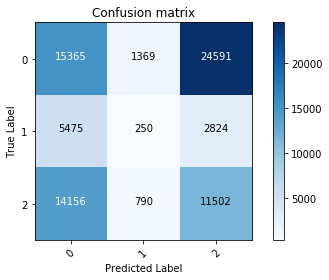

In [123]:
class_names = set(y_train)

plot_confusion_matrix(cm=cnf_matrix, classes=class_names,
                          normalize=False,
                          title='Confusion matrix')

Now that the minority class is being predicted, the recall ability of the model has improved.  In contrast, the model's accuracy decreased to ~40% after resampling.

Next, we'll repeat hyperparameter optimization after having oversampled the minority class.

# SMOTE - Deep Learning Model Optimization

## Tuning: Batch Size and Number of Epochs for Neural Networks

In [129]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# fix random seed for reproducibility
#seed = 123

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

# Define grid search parameters:
batch_size = [32, 64, 128, 256]
epochs = [50, 100, 150, 250]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_smote, y_train_smote_fit)

# summarize results:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/150
123435/123435 [==============================] - 5s 40us/step - loss: 1.0801 - acc: 0.3998
Epoch 2/150
123435/123435 [==============================] - 4s 29us/step - loss: 1.0553 - acc: 0.4366
Epoch 3/150
123435/123435 [==============================] - 3s 26us/step - loss: 1.0493 - acc: 0.4412
Epoch 4/150
123435/123435 [==============================] - 3s 25us/step - loss: 1.0456 - acc: 0.4468
Epoch 5/150
123435/123435 [==============================] - 3s 24us/step - loss: 1.0419 - acc: 0.4505
Epoch 6/150
123435/123435 [==============================] - 3s 23us/step - loss: 1.0385 - acc: 0.4542
Epoch 7/150
123435/123435 [==============================] - 3s 22us/step - loss: 1.0354 - acc: 0.4572
Epoch 8/150
123435/123435 [==============================] - 3s 22us/step - loss: 1.0328 - acc: 0.4620
Epoch 9/150
123435/123435 [==============================] - 3s 22us/step - loss: 1.0307 - acc: 0.4636
Epoch 10/150
123435/123435 [==============================] - 3s 22us/ste

123435/123435 [==============================] - 2s 19us/step - loss: 0.9888 - acc: 0.5027
Epoch 80/150
123435/123435 [==============================] - 2s 20us/step - loss: 0.9881 - acc: 0.5032
Epoch 81/150
123435/123435 [==============================] - 2s 20us/step - loss: 0.9877 - acc: 0.5040
Epoch 82/150
123435/123435 [==============================] - 2s 19us/step - loss: 0.9880 - acc: 0.5040
Epoch 83/150
123435/123435 [==============================] - 2s 20us/step - loss: 0.9879 - acc: 0.5028
Epoch 84/150
123435/123435 [==============================] - 3s 20us/step - loss: 0.9880 - acc: 0.5037
Epoch 85/150
123435/123435 [==============================] - 3s 20us/step - loss: 0.9879 - acc: 0.5036
Epoch 86/150
123435/123435 [==============================] - 3s 20us/step - loss: 0.9876 - acc: 0.5041
Epoch 87/150
123435/123435 [==============================] - 3s 21us/step - loss: 0.9873 - acc: 0.5042
Epoch 88/150
123435/123435 [==============================] - 3s 21us/step - 

## Tune Training Optimization Algorithm:

In [130]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=64, verbose=2)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_smote, y_train_smote_fit)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/150
 - 7s - loss: 1.0660 - acc: 0.4206
Epoch 2/150
 - 5s - loss: 1.0524 - acc: 0.4364
Epoch 3/150
 - 4s - loss: 1.0493 - acc: 0.4395
Epoch 4/150
 - 4s - loss: 1.0466 - acc: 0.4433
Epoch 5/150
 - 4s - loss: 1.0441 - acc: 0.4469
Epoch 6/150
 - 4s - loss: 1.0414 - acc: 0.4492
Epoch 7/150
 - 4s - loss: 1.0394 - acc: 0.4520
Epoch 8/150
 - 3s - loss: 1.0374 - acc: 0.4543
Epoch 9/150
 - 3s - loss: 1.0352 - acc: 0.4580
Epoch 10/150
 - 3s - loss: 1.0331 - acc: 0.4603
Epoch 11/150
 - 3s - loss: 1.0317 - acc: 0.4627
Epoch 12/150
 - 3s - loss: 1.0301 - acc: 0.4635
Epoch 13/150
 - 3s - loss: 1.0286 - acc: 0.4658
Epoch 14/150
 - 3s - loss: 1.0269 - acc: 0.4672
Epoch 15/150
 - 3s - loss: 1.0258 - acc: 0.4679
Epoch 16/150
 - 3s - loss: 1.0242 - acc: 0.4698
Epoch 17/150
 - 3s - loss: 1.0231 - acc: 0.4699
Epoch 18/150
 - 3s - loss: 1.0217 - acc: 0.4730
Epoch 19/150
 - 3s - loss: 1.0205 - acc: 0.4741
Epoch 20/150
 - 3s - loss: 1.0191 - acc: 0.4760
Epoch 21/150
 - 3s - loss: 1.0177 - acc: 0.4778
E

## Tune Learning Rate:

In [133]:

# Function to create model, required for KerasClassifier
def create_model(learn_rate=.01):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    optimizer = Adamax(lr=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=64, verbose=2)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_smote, y_train_smote_fit)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/150
 - 5s - loss: 1.0584 - acc: 0.4295
Epoch 2/150
 - 3s - loss: 1.0492 - acc: 0.4408
Epoch 3/150
 - 3s - loss: 1.0433 - acc: 0.4477
Epoch 4/150
 - 3s - loss: 1.0387 - acc: 0.4545
Epoch 5/150
 - 3s - loss: 1.0347 - acc: 0.4590
Epoch 6/150
 - 3s - loss: 1.0312 - acc: 0.4640
Epoch 7/150
 - 3s - loss: 1.0283 - acc: 0.4656
Epoch 8/150
 - 3s - loss: 1.0259 - acc: 0.4669
Epoch 9/150
 - 3s - loss: 1.0244 - acc: 0.4702
Epoch 10/150
 - 3s - loss: 1.0223 - acc: 0.4708
Epoch 11/150
 - 2s - loss: 1.0207 - acc: 0.4733
Epoch 12/150
 - 2s - loss: 1.0192 - acc: 0.4742
Epoch 13/150
 - 2s - loss: 1.0173 - acc: 0.4782
Epoch 14/150
 - 2s - loss: 1.0156 - acc: 0.4792
Epoch 15/150
 - 2s - loss: 1.0145 - acc: 0.4793
Epoch 16/150
 - 2s - loss: 1.0134 - acc: 0.4815
Epoch 17/150
 - 2s - loss: 1.0122 - acc: 0.4826
Epoch 18/150
 - 2s - loss: 1.0105 - acc: 0.4827
Epoch 19/150
 - 2s - loss: 1.0095 - acc: 0.4828
Epoch 20/150
 - 2s - loss: 1.0080 - acc: 0.4856
Epoch 21/150
 - 2s - loss: 1.0069 - acc: 0.4867
E

## Tune Weight Initializaton:

In [134]:
# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    optimizer = Adamax(lr=.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=64, verbose=2)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_smote, y_train_smote_fit)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/150
 - 3s - loss: 1.0584 - acc: 0.4294
Epoch 2/150
 - 2s - loss: 1.0482 - acc: 0.4426
Epoch 3/150
 - 2s - loss: 1.0422 - acc: 0.4476
Epoch 4/150
 - 2s - loss: 1.0379 - acc: 0.4540
Epoch 5/150
 - 2s - loss: 1.0337 - acc: 0.4608
Epoch 6/150
 - 2s - loss: 1.0304 - acc: 0.4625
Epoch 7/150
 - 2s - loss: 1.0269 - acc: 0.4683
Epoch 8/150
 - 2s - loss: 1.0237 - acc: 0.4708
Epoch 9/150
 - 2s - loss: 1.0212 - acc: 0.4732
Epoch 10/150
 - 2s - loss: 1.0183 - acc: 0.4765
Epoch 11/150
 - 2s - loss: 1.0162 - acc: 0.4784
Epoch 12/150
 - 2s - loss: 1.0142 - acc: 0.4797
Epoch 13/150
 - 2s - loss: 1.0130 - acc: 0.4814
Epoch 14/150
 - 2s - loss: 1.0110 - acc: 0.4842
Epoch 15/150
 - 2s - loss: 1.0092 - acc: 0.4848
Epoch 16/150
 - 2s - loss: 1.0084 - acc: 0.4851
Epoch 17/150
 - 2s - loss: 1.0077 - acc: 0.4859
Epoch 18/150
 - 2s - loss: 1.0059 - acc: 0.4887
Epoch 19/150
 - 2s - loss: 1.0050 - acc: 0.4880
Epoch 20/150
 - 2s - loss: 1.0035 - acc: 0.4908
Epoch 21/150
 - 2s - loss: 1.0027 - acc: 0.4907
E

In [136]:
## Tune Droprate Regularization:

# Use scikit-learn to grid search the dropout rate
from keras.constraints import maxnorm

# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0, weight_constraint=0, init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    optimizer = Adamax(lr=.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=64, verbose=2)

# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.25, 0.5, 0.75, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_smote, y_train_smote_fit)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/150
 - 4s - loss: 1.0590 - acc: 0.4278
Epoch 2/150
 - 3s - loss: 1.0494 - acc: 0.4410
Epoch 3/150
 - 3s - loss: 1.0436 - acc: 0.4466
Epoch 4/150
 - 3s - loss: 1.0386 - acc: 0.4548
Epoch 5/150
 - 2s - loss: 1.0342 - acc: 0.4606
Epoch 6/150
 - 2s - loss: 1.0302 - acc: 0.4637
Epoch 7/150
 - 2s - loss: 1.0276 - acc: 0.4678
Epoch 8/150
 - 2s - loss: 1.0246 - acc: 0.4694
Epoch 9/150
 - 2s - loss: 1.0217 - acc: 0.4742
Epoch 10/150
 - 2s - loss: 1.0185 - acc: 0.4769
Epoch 11/150
 - 2s - loss: 1.0160 - acc: 0.4780
Epoch 12/150
 - 2s - loss: 1.0135 - acc: 0.4817
Epoch 13/150
 - 2s - loss: 1.0112 - acc: 0.4843
Epoch 14/150
 - 2s - loss: 1.0093 - acc: 0.4845
Epoch 15/150
 - 2s - loss: 1.0074 - acc: 0.4848
Epoch 16/150
 - 2s - loss: 1.0052 - acc: 0.4868
Epoch 17/150
 - 2s - loss: 1.0036 - acc: 0.4899
Epoch 18/150
 - 2s - loss: 1.0024 - acc: 0.4914
Epoch 19/150
 - 2s - loss: 1.0011 - acc: 0.4899
Epoch 20/150
 - 2s - loss: 1.0005 - acc: 0.4928
Epoch 21/150
 - 2s - loss: 0.9983 - acc: 0.4939
E

## Tune Model Regularizers:

In [147]:
# L2:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0, weight_constraint=2, init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu', kernel_regularizer=regularizers.l2(.005)))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(.005)))
    model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(.005)))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    optimizer = Adamax(lr=.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=64, verbose=2)
history = model.fit(X_train_smote, y_train_smote_fit)

Epoch 1/150
 - 3s - loss: 1.0837 - acc: 0.4182
Epoch 2/150
 - 3s - loss: 1.0723 - acc: 0.4203
Epoch 3/150
 - 3s - loss: 1.0710 - acc: 0.4205
Epoch 4/150
 - 3s - loss: 1.0701 - acc: 0.4206
Epoch 5/150
 - 3s - loss: 1.0702 - acc: 0.4196
Epoch 6/150
 - 2s - loss: 1.0697 - acc: 0.4195
Epoch 7/150
 - 2s - loss: 1.0696 - acc: 0.4198
Epoch 8/150
 - 2s - loss: 1.0695 - acc: 0.4189
Epoch 9/150
 - 3s - loss: 1.0695 - acc: 0.4208
Epoch 10/150
 - 2s - loss: 1.0693 - acc: 0.4203
Epoch 11/150
 - 2s - loss: 1.0689 - acc: 0.4200
Epoch 12/150
 - 2s - loss: 1.0691 - acc: 0.4207
Epoch 13/150
 - 2s - loss: 1.0688 - acc: 0.4210
Epoch 14/150
 - 2s - loss: 1.0690 - acc: 0.4198
Epoch 15/150
 - 2s - loss: 1.0687 - acc: 0.4206
Epoch 16/150
 - 2s - loss: 1.0685 - acc: 0.4206
Epoch 17/150
 - 2s - loss: 1.0685 - acc: 0.4209
Epoch 18/150
 - 2s - loss: 1.0685 - acc: 0.4209
Epoch 19/150
 - 3s - loss: 1.0687 - acc: 0.4197
Epoch 20/150
 - 3s - loss: 1.0686 - acc: 0.4198
Epoch 21/150
 - 3s - loss: 1.0686 - acc: 0.4196
E

In [148]:
# L1:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu', kernel_regularizer=regularizers.l1(.005)))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1(.005)))
    model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l1(.005)))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    optimizer = Adamax(lr=.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=64, verbose=2)
history = model.fit(X_train_smote, y_train_smote_fit)

Epoch 1/150
 - 3s - loss: 1.1145 - acc: 0.4174
Epoch 2/150
 - 2s - loss: 1.0907 - acc: 0.4200
Epoch 3/150
 - 2s - loss: 1.0893 - acc: 0.4193
Epoch 4/150
 - 2s - loss: 1.0883 - acc: 0.4193
Epoch 5/150
 - 2s - loss: 1.0882 - acc: 0.4190
Epoch 6/150
 - 2s - loss: 1.0876 - acc: 0.4194
Epoch 7/150
 - 2s - loss: 1.0873 - acc: 0.4198
Epoch 8/150
 - 2s - loss: 1.0870 - acc: 0.4195
Epoch 9/150
 - 2s - loss: 1.0870 - acc: 0.4203
Epoch 10/150
 - 2s - loss: 1.0868 - acc: 0.4196
Epoch 11/150
 - 2s - loss: 1.0862 - acc: 0.4193
Epoch 12/150
 - 2s - loss: 1.0863 - acc: 0.4194
Epoch 13/150
 - 3s - loss: 1.0860 - acc: 0.4196
Epoch 14/150
 - 2s - loss: 1.0860 - acc: 0.4189
Epoch 15/150
 - 2s - loss: 1.0857 - acc: 0.4204
Epoch 16/150
 - 2s - loss: 1.0857 - acc: 0.4192
Epoch 17/150
 - 2s - loss: 1.0855 - acc: 0.4195
Epoch 18/150
 - 2s - loss: 1.0855 - acc: 0.4197
Epoch 19/150
 - 2s - loss: 1.0855 - acc: 0.4189
Epoch 20/150
 - 2s - loss: 1.0854 - acc: 0.4192
Epoch 21/150
 - 2s - loss: 1.0855 - acc: 0.4189
E

## Final Model - 

In [150]:
# FINAL SMOTED MODEL:
def create_model(dropout_rate=0.0, weight_constraint=2):
    
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=27, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    # Compile model
    optimizer = Adamax(lr=.01)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    print(model.summary())
    return model

# fix random seed for reproducibility
seed = 123
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=64, verbose=2)
model.fit(X_train_smote, y_train_smote_fit)

perm = PermutationImportance(model, random_state=123).fit(X_train_smote, y_train_smote_fit)
eli5.show_weights(perm, feature_names = X.columns.tolist())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 32)                896       
_________________________________________________________________
dense_104 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_105 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_106 (Dense)            (None, 3)                 27        
Total params: 1,587
Trainable params: 1,587
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
 - 4s - loss: 1.0582 - acc: 0.4296
Epoch 2/150
 - 2s - loss: 1.0481 - acc: 0.4417
Epoch 3/150
 - 2s - loss: 1.0421 - acc: 0.4489
Epoch 4/150
 - 2s - loss: 1.0370 - acc: 0.4563
Epoch 5/150
 - 2s - loss: 1.0331 - acc: 0.4606
Epoch 6/150
 - 2s - loss: 1.0298

Weight,Feature
0.0558 ± 0.0022,insulin_No
0.0536 ± 0.0026,number_inpatient
0.0478 ± 0.0008,insulin_Steady
0.0377 ± 0.0010,num_procedures
0.0365 ± 0.0011,ad_id_1
0.0346 ± 0.0019,discharge_home
0.0304 ± 0.0016,num_medications
0.0299 ± 0.0009,metformin_Steady
0.0289 ± 0.0015,log_add1_time_in_hospital
0.0260 ± 0.0017,number_diagnoses


In [152]:
display(model.score(X_train_smote, y_train_smote_fit))

0.5121318912771207

In [153]:
display(model.score(xtest, y_test_smote_fit))

0.4622066742835201

In [170]:
y_hat_train = model.predict(X_train_smote)
y

array([1, 2, 1, ..., 0, 2, 2])

In [171]:
cnf_matrix = confusion_matrix(y_true=ytrain_smote, y_pred=y_hat_train)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[11876 13023 16246]
 [24479  8786  7880]
 [13145 13961 14039]]


Confusion Matrix, without Normalization
[[11876 13023 16246]
 [24479  8786  7880]
 [13145 13961 14039]]


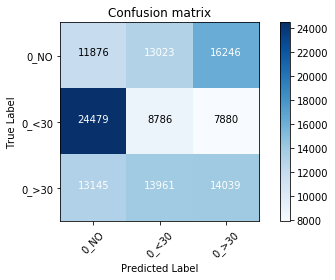

In [192]:
class_names = set(y_train_smote_fit)

fig = plt.figure()
plot_confusion_matrix(cm=cnf_matrix, classes=class_names,
                          normalize=False,
                          title='Confusion matrix')
fig.savefig('img/cnf_matrix_final')

In [ ]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))

In [187]:
display_acc_and_f1_score(true=y_train_smote, preds=y_hat_train, model_name=model)

Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x1a574a8c88>
Accuracy: 0.23606756592538583
F1-Score: 0.23721871263878724


In [ ]:
#???? above accuracy?

In [ ]:
display(model_smote.evaluate(xtrain_smote, y_train_smote_fit))

ytest

y_test_smote_ohe = ytest.replace({0: 'NO', 1: '<30', 2: '>30'})
#y_train_smote_ohe.rename(columns={0: ''}, inplace=True)
#y_train_smote[0].idxmax(axis=1).replace({0: 'NO', 1: '<30', 2: '>30'})
y_test_smote_fit = pd.get_dummies(y_test_smote_ohe)

y_test_smote_fit.head()

display(model_smote.evaluate(xtest, y_test_smote_fit))

y_hat_train = model_smote.predict(X_train)
y_hat_train = y_hat_train.argmax(axis=1)
#y_train_fix = y_train.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

#display(y_train_fix.head())
#display(y_hat_train.head())

cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_hat_train)
print('Confusion Matrix:\n', cnf_matrix)


model_smote.evaluate(X_train_smote, y_train_smote_fit)



#model_smote.evaluate(X_train, y_train)

#model_smote.evaluate(X_test, y_test)

#y_test.head()

#pd.DataFrame(np.argmax(model_smote.predict(X_test), axis=1))[0].value_counts()

#y_test_two = y_test.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

y_hat_train = model_smote.predict(X_train)

y_hat_train = y_hat_train.argmax(axis=1)

#display(y_train.head())
y_hat_train

#y_train_fix = y_train.idxmax(axis=1).replace({'NO': 0, '<30': 1, '>30': 2})

#cnf_matrix = confusion_matrix(y_true=y_train_fix, y_pred=y_hat_train)
#print('Confusion Matrix:\n', cnf_matrix)

set(y_train)

import itertools

class_names = set(y_train)

plot_confusion_matrix(cm=cnf_matrix, classes=class_names,
                          normalize=False,
                          title='Confusion matrix')